# **🌿SkinFusion: Hybrid Skincare Product Recommendation System🌿**

<div style="text-align:center;">
    <img src="images/skin_fusion.png" width="20%" height="20%">
</div>

# **1.0 Install Python Libraries**

In [1]:
# Install the required packages for my final year project
%pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.


# **2.0 Initial Setup**

In [2]:
# Import the necessary libraries
import ast
import html
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re
import seaborn as sns
import warnings

from bs4 import MarkupResemblesLocatorWarning
from collections import Counter
from datetime import datetime
from matplotlib.ticker import FuncFormatter
from wordcloud import WordCloud

# Download the necessary resources for the NLTK library
nltk.download("punkt")      # tokenizers
nltk.download("stopwords")  # stopwords
nltk.download("wordnet")    # lexical database for the English language

# Suppress MarkupResemblesLocatorWarning
warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)

# Configurations
pd.set_option("display.max_colwidth", 100)
start_time = datetime.now()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ethan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ethan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ethan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **3.0 Load Data**

The data for skincare reviews was obtained from the [<u>kaggle website</u>](https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews).

<img src="images/image_1.png" width="60%" height="60%">

## **3.1 `product_info`**

In [3]:
# Load the product info dataset
product_info = pd.read_csv("data/product_info.csv", encoding="utf-8", low_memory=False)


## **3.2 `all_reviews`**

In [4]:
# Create a list of all the reviews dataset
reviews_data = [
    "data/reviews_0-250.csv",
    "data/reviews_250-500.csv",
    "data/reviews_500-750.csv",
    "data/reviews_750-1250.csv",
    "data/reviews_1250-end.csv"
]

# Load all the reviews dataset and merge them into a single DataFrame
all_reviews = pd.concat([pd.read_csv(file, encoding="utf-8", low_memory=False) 
                         for file in reviews_data], ignore_index=True)

# Save the merged reviews dataset into a CSV file
all_reviews.to_csv("processed_data/all_reviews.csv", index=False, encoding="utf-8")


**Note:** The above code cell will be completely commented out, as I only load the merged reviews dataset each time I run it.

In [5]:
# Load the merged reviews dataset
all_reviews = pd.read_csv("processed_data/all_reviews.csv", encoding="utf-8", low_memory=False)


# **4.0 Data Understanding**

## **4.1 `product_info`**

In [6]:
# Display the first 5 rows of product_info
product_info.head().transpose()


,0,1,2,3,4
product_id,P473671,P473668,P473662,P473660,P473658
product_name,Fragrance Discovery Set,La Habana Eau de Parfum,Rainbow Bar Eau de Parfum,Kasbah Eau de Parfum,Purple Haze Eau de Parfum
brand_id,6342,6342,6342,6342,6342
brand_name,19-69,19-69,19-69,19-69,19-69
loves_count,6320,3827,3253,3018,2691
rating,3.6364,4.1538,4.25,4.4762,3.2308
reviews,11.0,13.0,16.0,21.0,13.0
size,NaN,3.4 oz/ 100 mL,3.4 oz/ 100 mL,3.4 oz/ 100 mL,3.4 oz/ 100 mL
variation_type,NaN,Size + Concentration + Formulation,Size + Concentration + Formulation,Size + Concentration + Formulation,Size + Concentration + Formulation
variation_value,NaN,3.4 oz/ 100 mL,3.4 oz/ 100 mL,3.4 oz/ 100 mL,3.4 oz/ 100 mL


In [7]:
# Display the DataFrame information of product_info
product_info.info(memory_usage="deep") # deep parameter is to display the exact memory usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [8]:
# Display the shape of product_info
print(f"{product_info.shape[0]} rows and {product_info.shape[1]} columns")


8494 rows and 27 columns


In [9]:
# Display the summary statistics of product_info
product_info.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
brand_id,8494.0,5422.440546,1709.595957,1063.00,5333.000000,6157.50000,6328.000000,8020.0
loves_count,8494.0,29179.565929,66092.122590,0.00,3758.000000,9880.00000,26841.250000,1401068.0
rating,8216.0,4.194513,0.516694,1.00,3.981725,4.28935,4.530525,5.0
reviews,8216.0,448.545521,1101.982529,1.00,26.000000,122.00000,418.000000,21281.0
price_usd,8494.0,51.655595,53.669234,3.00,25.000000,35.00000,58.000000,1900.0
value_price_usd,451.0,91.168537,79.195631,0.00,45.000000,67.00000,108.500000,617.0
sale_price_usd,270.0,20.207889,24.327352,1.75,8.000000,14.00000,25.000000,320.0
limited_edition,8494.0,0.070285,0.255642,0.00,0.000000,0.00000,0.000000,1.0
new,8494.0,0.071698,0.258002,0.00,0.000000,0.00000,0.000000,1.0
online_only,8494.0,0.219096,0.413658,0.00,0.000000,0.00000,0.000000,1.0


In [10]:
# Create a DataFrame to display the unique values and missing values in each column of product_info
product_unique_missing = pd.DataFrame({
    "Data Types": product_info.dtypes,
    "Unique Values": product_info.nunique(),
    "Unique Values (%)": (product_info.nunique() / product_info.shape[0] * 100).round(2).astype(str) + "%",
    "Missing Values": product_info.isnull().sum(),
    "Missing Values (%)": (product_info.isnull().sum() / product_info.shape[0] * 100).round(2).astype(str) + "%"
})

# Display the DataFrame sorted by the missing values in descending order
product_unique_missing.sort_values(by="Missing Values", ascending=False)


,Data Types,Unique Values,Unique Values (%),Missing Values,Missing Values (%)
sale_price_usd,float64,88,1.04%,8224,96.82%
value_price_usd,float64,174,2.05%,8043,94.69%
variation_desc,object,935,11.01%,7244,85.28%
child_max_price,float64,222,2.61%,5740,67.58%
child_min_price,float64,208,2.45%,5740,67.58%
highlights,object,4417,52.0%,2207,25.98%
size,object,2055,24.19%,1631,19.2%
variation_value,object,2729,32.13%,1598,18.81%
variation_type,object,7,0.08%,1444,17.0%
tertiary_category,object,118,1.39%,990,11.66%


In [11]:
# Delete the product_missing DataFrame to free up memory
del product_unique_missing


## **4.2 `all_reviews`**

In [12]:
# Display the first 5 rows of all_reviews
all_reviews.head().transpose()


,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
author_id,1741593524,31423088263,5061282401,6083038851,47056667835
rating,5,1,5,5,5
is_recommended,1.0,0.0,1.0,1.0,1.0
helpfulness,1.0,NaN,NaN,NaN,NaN
total_feedback_count,2,0,0,0,0
total_neg_feedback_count,0,0,0,0,0
total_pos_feedback_count,2,0,0,0,0
submission_time,2023-02-01,2023-03-21,2023-03-21,2023-03-20,2023-03-20
review_text,I use this with the Nudestix “Citrus Clean Balm & Make-Up Melt“ to double cleanse and it has com...,"I bought this lip mask after reading the reviews and the hype. Unfortunately, it did not meet my...",My review title says it all! I get so excited to get into bed and apply this lip mask. I do see ...,I’ve always loved this formula for a long time. I honestly don’t even use it for night time. I u...,"If you have dry cracked lips, this is a must have. After a few weeks of use I have learned I wil..."


**Note:** The `Unnamed: 0` appears to be an indexed column, so I will drop it.

In [13]:
# Drop the "Unnamed: 0" column from all_reviews
all_reviews.drop(columns="Unnamed: 0", inplace=True)


In [14]:
# Display the DataFrame information of all_reviews
all_reviews.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094411 entries, 0 to 1094410
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   author_id                 1094411 non-null  object 
 1   rating                    1094411 non-null  int64  
 2   is_recommended            926423 non-null   float64
 3   helpfulness               532819 non-null   float64
 4   total_feedback_count      1094411 non-null  int64  
 5   total_neg_feedback_count  1094411 non-null  int64  
 6   total_pos_feedback_count  1094411 non-null  int64  
 7   submission_time           1094411 non-null  object 
 8   review_text               1092967 non-null  object 
 9   review_title              783757 non-null   object 
 10  skin_tone                 923872 non-null   object 
 11  eye_color                 884783 non-null   object 
 12  skin_type                 982854 non-null   object 
 13  hair_color                8

In [15]:
# Display the shape of all_reviews
print(f"{all_reviews.shape[0]} rows and {all_reviews.shape[1]} columns")


1094411 rows and 18 columns


In [16]:
# Display the summary statistics of all_reviews
all_reviews.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
rating,1094411.0,4.299158,1.149444,1.0,4.000000,5.000000,5.0,5.0
is_recommended,926423.0,0.839962,0.366642,0.0,1.000000,1.000000,1.0,1.0
helpfulness,532819.0,0.767782,0.317164,0.0,0.652174,0.928571,1.0,1.0
total_feedback_count,1094411.0,4.177126,22.715238,0.0,0.000000,0.000000,3.0,5464.0
total_neg_feedback_count,1094411.0,0.894869,5.288943,0.0,0.000000,0.000000,1.0,1159.0
total_pos_feedback_count,1094411.0,3.282257,19.674818,0.0,0.000000,0.000000,3.0,5050.0
price_usd,1094411.0,49.008382,40.043383,3.0,25.000000,39.000000,62.0,1900.0


In [17]:
# Create a DataFrame to display the unique values and missing values in each column of all_reviews
reviews_unique_missing = pd.DataFrame({
    "Data Types": all_reviews.dtypes,
    "Unique Values": all_reviews.nunique(),
    "Unique Values (%)": (all_reviews.nunique() / all_reviews.shape[0] * 100).round(2).astype(str) + "%",
    "Missing Values": all_reviews.isnull().sum(),
    "Missing Values (%)": (all_reviews.isnull().sum() / all_reviews.shape[0] * 100).round(2).astype(str) + "%"
})

# Display the unique values and missing values in each column of all_reviews sorted by missing values
reviews_unique_missing.sort_values(by="Missing Values", ascending=False)


,Data Types,Unique Values,Unique Values (%),Missing Values,Missing Values (%)
helpfulness,float64,3767,0.34%,561592,51.31%
review_title,object,364105,33.27%,310654,28.39%
hair_color,object,7,0.0%,226768,20.72%
eye_color,object,6,0.0%,209628,19.15%
skin_tone,object,14,0.0%,170539,15.58%
is_recommended,float64,2,0.0%,167988,15.35%
skin_type,object,4,0.0%,111557,10.19%
review_text,object,969419,88.58%,1444,0.13%
brand_name,object,142,0.01%,0,0.0%
product_name,object,2334,0.21%,0,0.0%


In [18]:
# Delete the reviews_missing DataFrame to free up memory
del reviews_unique_missing


# **5.0 Preliminary Exploratory Data Analysis (EDA)**

In [19]:
# Initialize the style of the plots
sns.set_style("whitegrid")


## **5.1 Univariate Analysis**

### **5.1.1 Top 10 Brands by Number of Products**

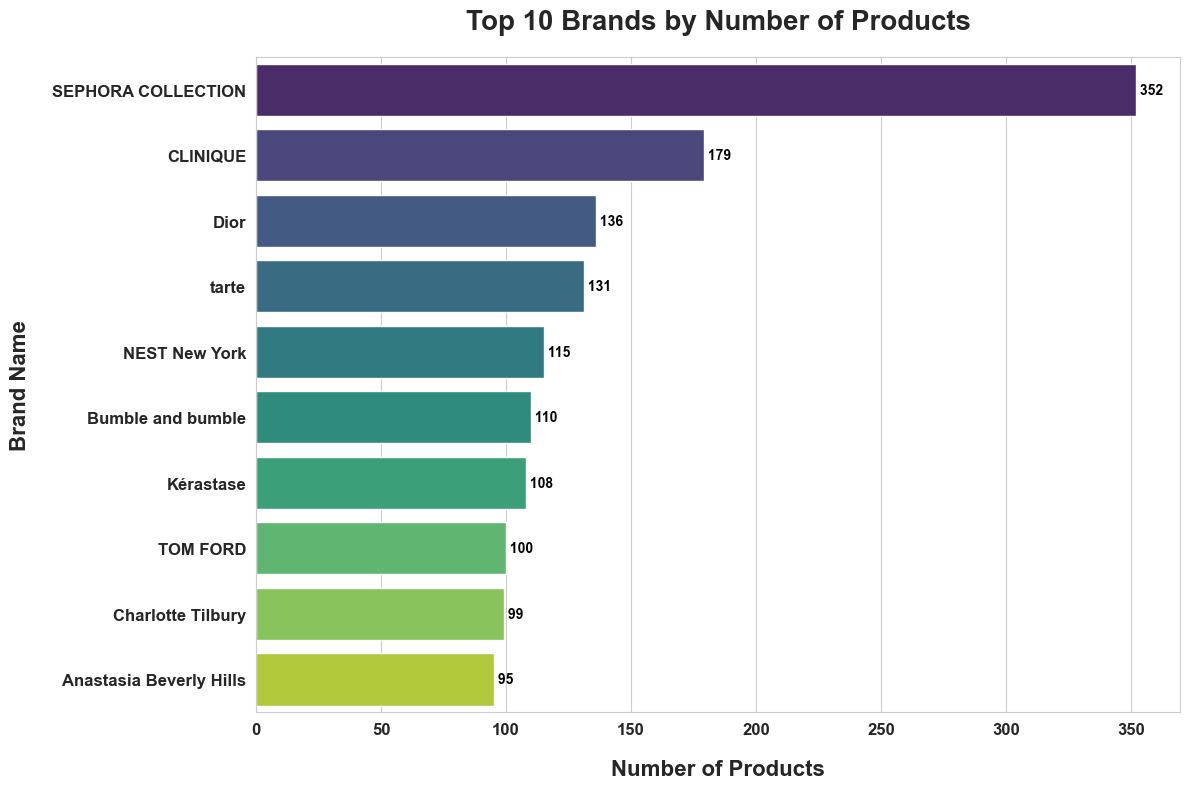

In [20]:
# Identify the top 10 brands
top_brands = product_info["brand_name"].value_counts().head(10)

# Plot a bar chart showing the top 10 brands by number of products
plt.figure(figsize=(12, 8))
sns.barplot(x=top_brands.values, y=top_brands.index, hue=top_brands.index, palette="viridis", legend=False)
plt.title("Top 10 Brands by Number of Products", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Number of Products", fontsize=16, fontweight="bold", labelpad=16)
plt.ylabel("Brand Name", fontsize=16, fontweight="bold", labelpad=16)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# Add text annotations
for i, v in enumerate(top_brands.values):
    plt.text(v, i, f" {v}", color="black", fontweight="bold", va="center")

# Display the plot
plt.tight_layout()
plt.show()


### **5.1.2 Distribution of Products Across Primary Categories**

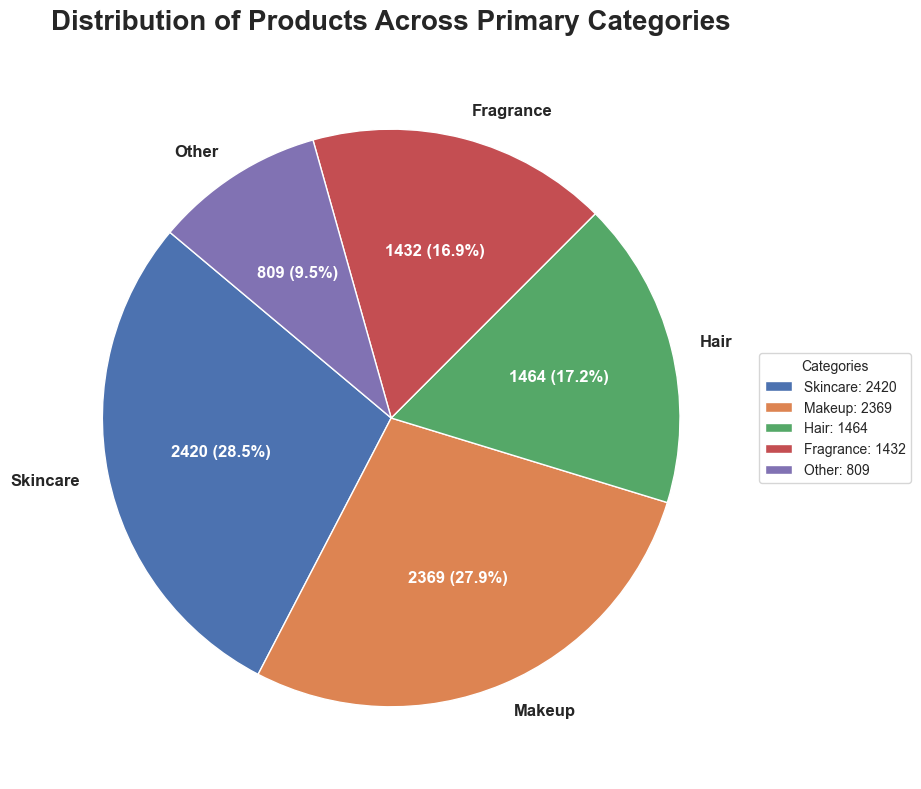

In [21]:
# Count the number of products in each primary category
category_counts = product_info["primary_category"].value_counts()

# Keep the top 4 categories and aggregate the rest
top_categories = category_counts.head(4)
top_categories["Other"] = category_counts[4:].sum()

# Define a custom function for autopct to display both count and percentage
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f"{val:d} ({pct:.1f}%)"
    return my_format

# Plot a pie chart showing the distribution for the top 4 categories and "Other"
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(top_categories, labels=top_categories.index, autopct=autopct_format(top_categories.values),
                                   startangle=140, colors=sns.color_palette("deep", 5), textprops=dict(fontsize=12, fontweight="bold"))
plt.setp(autotexts, size=12, weight="bold", color="white")
plt.title("Distribution of Products Across Primary Categories", fontsize=20, fontweight="bold", pad=20)

# Create the legend, showing categories with their amounts
legend_labels = [f"{label}: {value}" for label, value in top_categories.items()]
plt.legend(wedges, legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Display the plot
plt.tight_layout()
plt.show()


**Note:** For the purposes of this project, I will be focusing solely on **skincare products**, so for the data preprocessing phase later on, I will keep only skincare-related data.

### **5.1.3 Distribution of Products Across Secondary Categories**

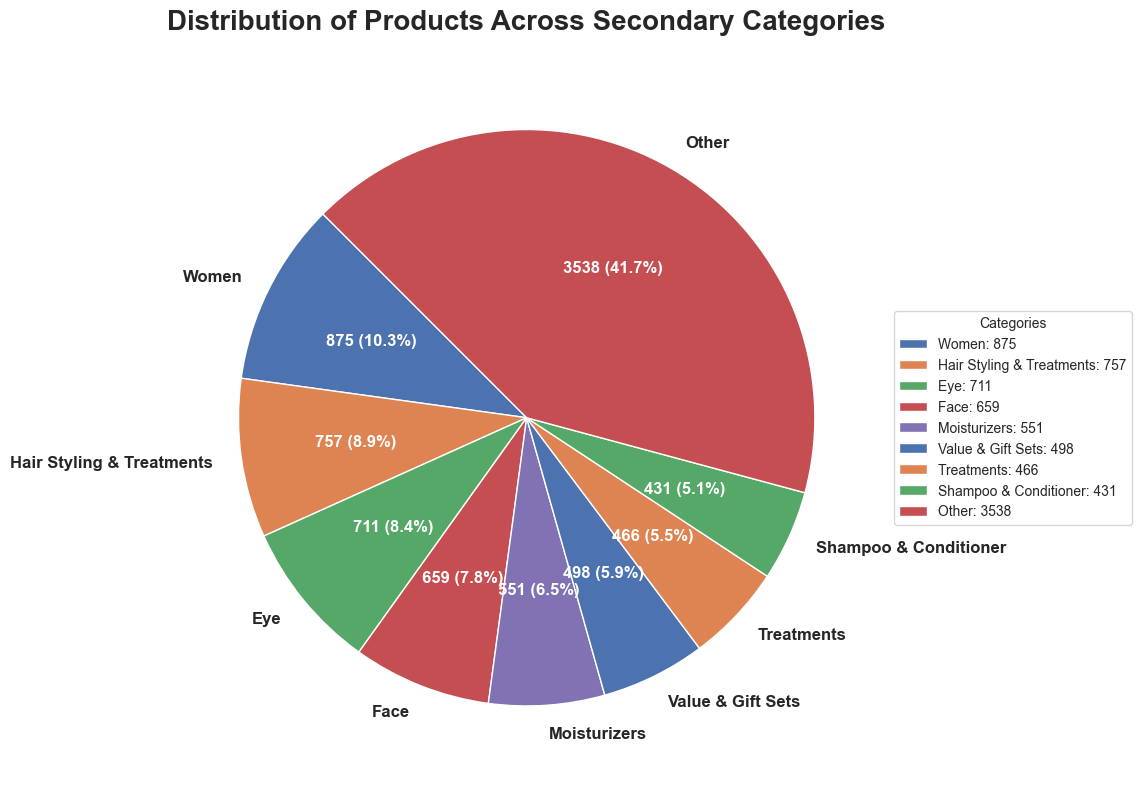

In [22]:
# Count the number of products in each secondary category
secondary_category_counts = product_info["secondary_category"].value_counts()

# Keep the top 8 secondary categories and aggregate the rest
top_secondary_categories = secondary_category_counts.head(8)
top_secondary_categories["Other"] = secondary_category_counts[8:].sum()

# Plot a pie chart showing the distribution for the top 8 secondary categories and "Other"
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(top_secondary_categories, labels=top_secondary_categories.index, autopct=autopct_format(top_secondary_categories.values),
                                   startangle=135, colors=sns.color_palette("deep", 5), textprops=dict(fontsize=12, fontweight="bold"))
plt.setp(autotexts, size=12, weight="bold", color="white")
plt.title("Distribution of Products Across Secondary Categories", fontsize=20, fontweight="bold", pad=20)

# Create the legend, showing categories with their amounts
legend_labels_secondary = [f"{label}: {value}" for label, value in top_secondary_categories.items()]
plt.legend(wedges, legend_labels_secondary, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Display the plot
plt.tight_layout()
plt.show()


### **5.1.4 Distribution of Products Across Tertiary Categories**

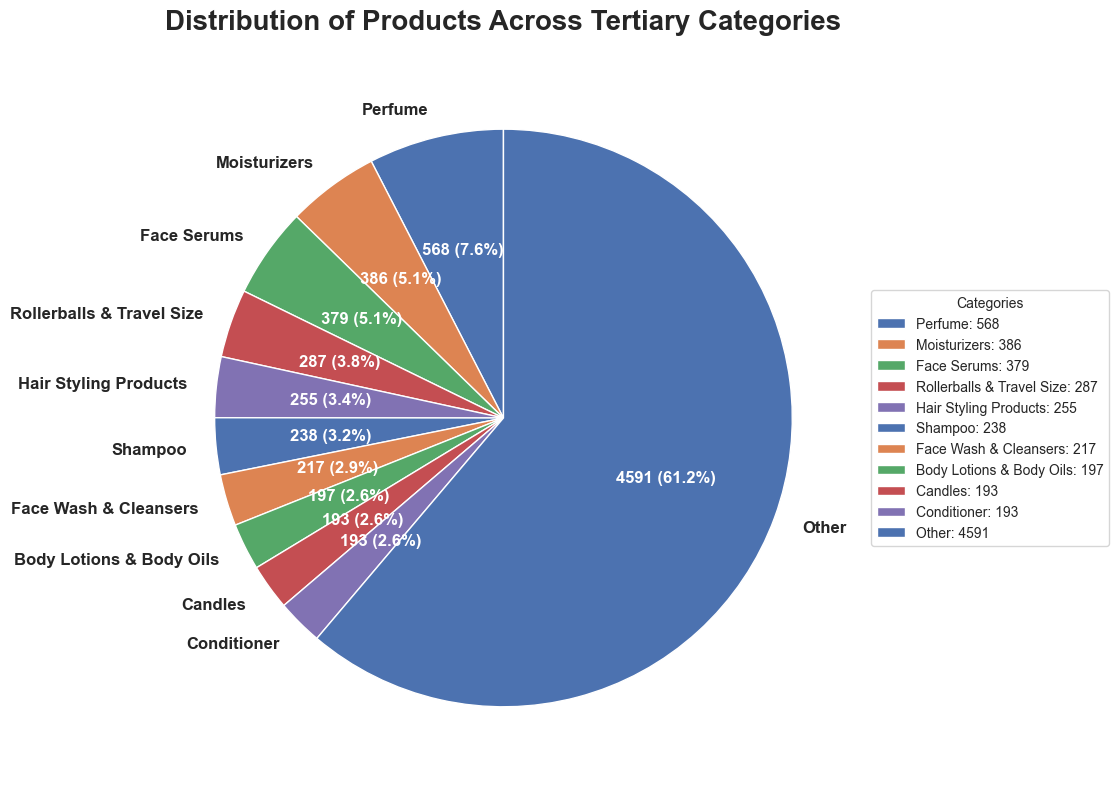

In [23]:
# Count the number of products in each tertiary category
tertiary_category_counts = product_info["tertiary_category"].value_counts()

# Keep the top 10 tertiary categories and aggregate the rest
top_tertiary_categories = tertiary_category_counts.head(10)
top_tertiary_categories["Other"] = tertiary_category_counts[10:].sum()

# Plot a pie chart showing the distribution for the top 10 tertiary categories and "Other"
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(top_tertiary_categories, labels=top_tertiary_categories.index, autopct=autopct_format(top_tertiary_categories.values),
                                   startangle=90, colors=sns.color_palette("deep", 5), textprops=dict(fontsize=12, fontweight="bold"))
plt.setp(autotexts, size=12, weight="bold", color="white")
plt.title("Distribution of Products Across Tertiary Categories", fontsize=20, fontweight="bold", pad=20)

# Create the legend, showing categories with their amounts
legend_labels_tertiary = [f"{label}: {value}" for label, value in top_tertiary_categories.items()]
plt.legend(wedges, legend_labels_tertiary, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Display the plot
plt.tight_layout()
plt.show()


### **5.1.5 Distribution of Product Loves Count**

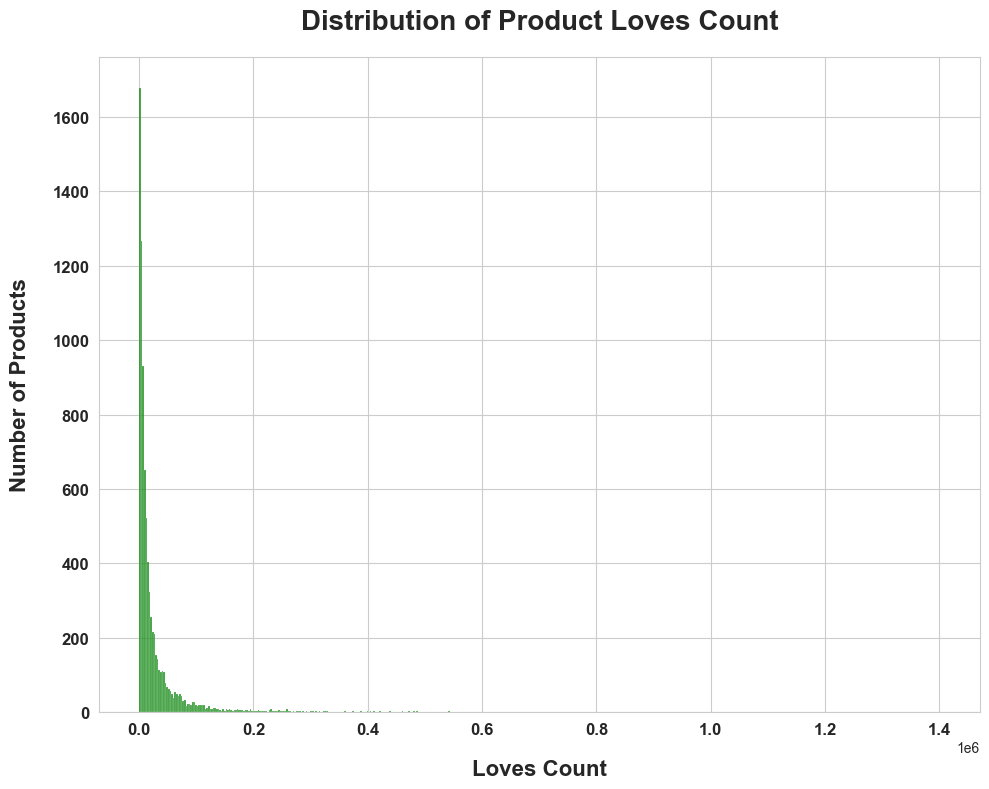

In [24]:
# Plot a histogram showing the distribution of the product loves count
plt.figure(figsize=(10, 8))
sns.histplot(product_info["loves_count"], kde=False, color="green", bins=500)
plt.title("Distribution of Product Loves Count", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Loves Count", fontsize=16, fontweight="bold", labelpad=16)
plt.ylabel("Number of Products", fontsize=16, fontweight="bold", labelpad=16)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# Display the plot
plt.tight_layout()
plt.show()


**Note:** The histogram is left-skewed, but I limit the `loves_count` to 200,000 to get a better view.

In [25]:
# Display the top 20 loves_count values
product_info["loves_count"].value_counts().sort_index().tail(20)


loves_count
583724     1
593515     1
605038     1
617437     1
622995     1
639063     1
652806     1
684860     1
720504     1
757716     1
763168     1
813497     1
834189     1
840076     1
856497     1
968317     1
1029051    1
1081315    1
1153594    1
1401068    1
Name: count, dtype: int64

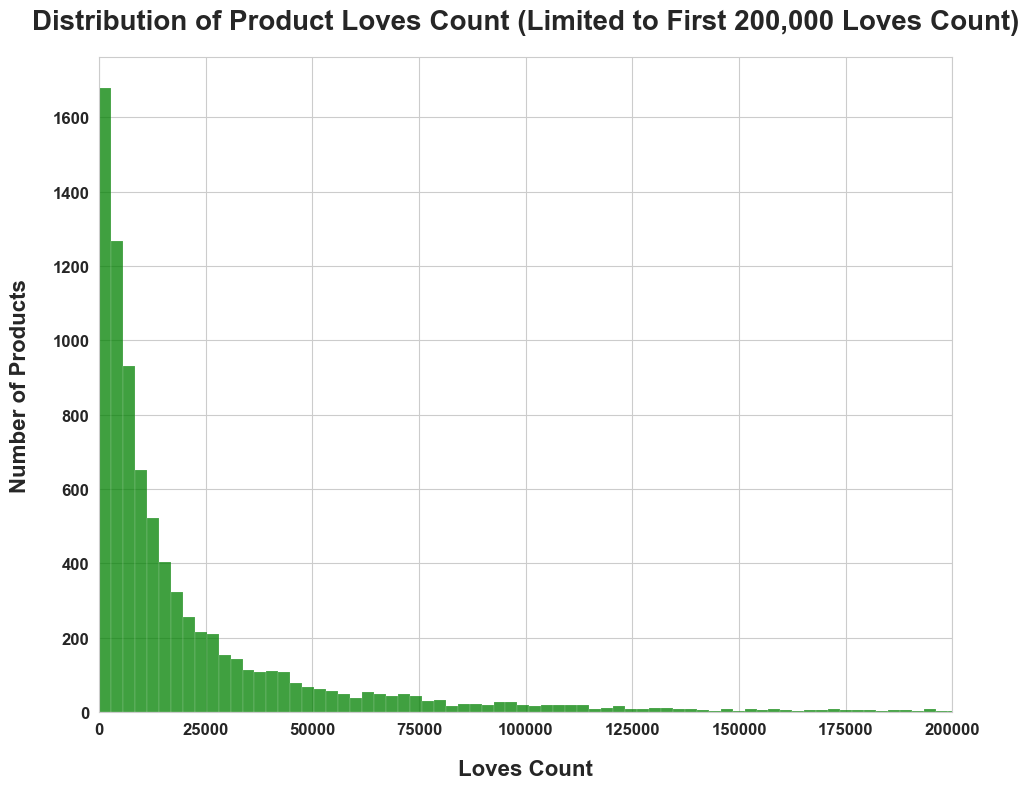

In [26]:
# Plot a histogram showing the distribution of the product loves count (limited to first 200,000 loves count)
plt.figure(figsize=(10, 8))
sns.histplot(product_info["loves_count"], kde=False, color="green", bins=500)
plt.title("Distribution of Product Loves Count (Limited to First 200,000 Loves Count)", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Loves Count", fontsize=16, fontweight="bold", labelpad=16)
plt.ylabel("Number of Products", fontsize=16, fontweight="bold", labelpad=16)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# Limit the x-axis to 200,000
plt.xlim(0, 200000)

# Display the plot
plt.tight_layout()
plt.show()


### **5.1.6 Distribution of the Product Ratings**

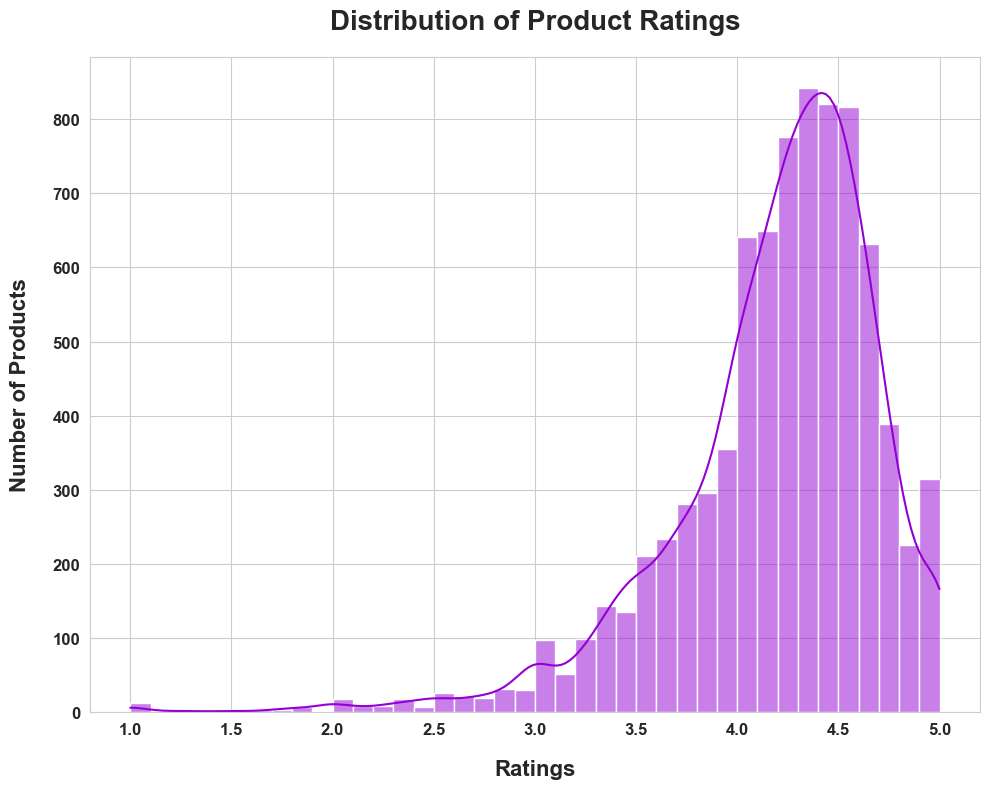

In [27]:
# Plot a histogram showing the distribution of product ratings
plt.figure(figsize=(10, 8))
sns.histplot(product_info["rating"], kde=True, color="darkviolet", bins=40)
plt.title("Distribution of Product Ratings", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Ratings", fontsize=16, fontweight="bold", labelpad=16)
plt.ylabel("Number of Products", fontsize=16, fontweight="bold", labelpad=16)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# Display the plot
plt.tight_layout()
plt.show()


### **5.1.7 Distribution of the Binary Attributes**

**Note:** The binary attributes within the product_info dataset contain the following values:
1. `limited_edition`
2. `new`
3. `online_only`
4. `out_of_stock`
5. `sephora_exclusive`

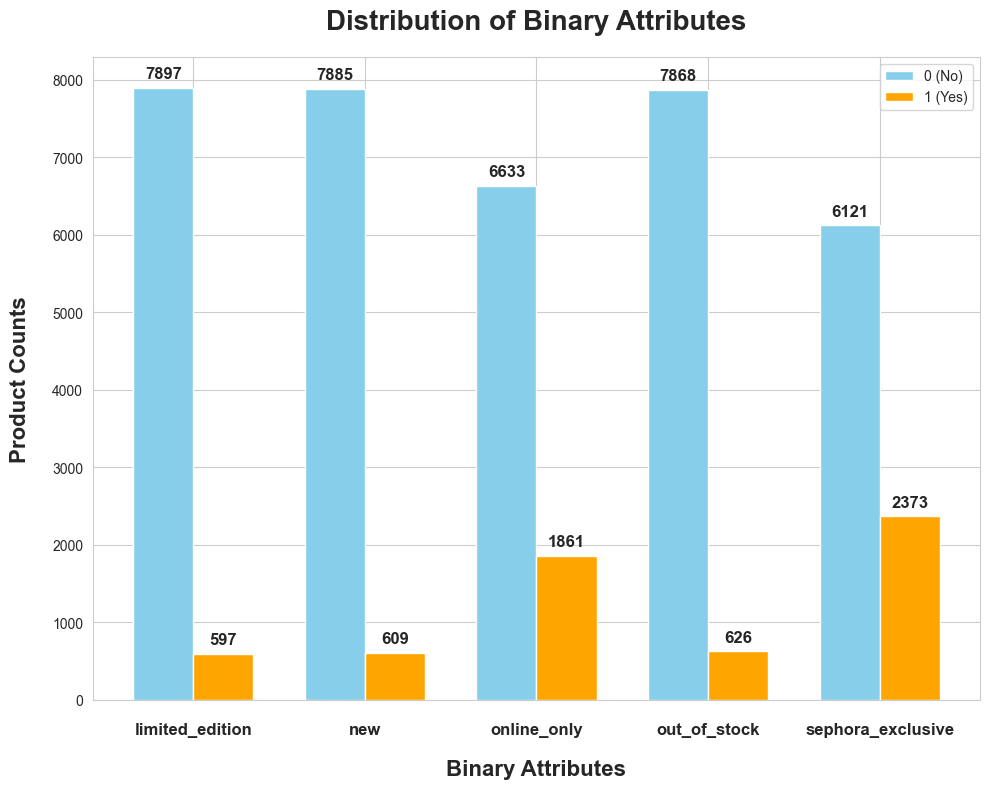

In [28]:
# Columns which contain binary values 
binary_columns = ["limited_edition", "new", "online_only", "out_of_stock", "sephora_exclusive"]

# Prepare the figure
plt.figure(figsize=(10, 8))
plt.tick_params(axis="x", which="major", pad=12)
positions = np.arange(len(binary_columns))
bar_width = 0.35
colors = ["skyblue", "orange"]

# Plot each binary attribute
for i, column in enumerate(binary_columns):
    counts = product_info[column].value_counts(normalize=False).sort_index()
    plt.bar(i - bar_width/2, counts[0], bar_width, color=colors[0], label="0 (No)" if i == 0 else "")
    plt.bar(i + bar_width/2, counts[1], bar_width, color=colors[1], label="1 (Yes)" if i == 0 else "")

# Add some textual info
plt.xlabel("Binary Attributes", fontsize=16, fontweight="bold", labelpad=16)
plt.ylabel("Product Counts", fontsize=16, fontweight="bold", labelpad=16)
plt.title("Distribution of Binary Attributes", fontsize=20, fontweight="bold", pad=20)
plt.xticks(positions, labels=binary_columns, fontsize=12, fontweight="bold")
plt.legend()

# Function to add value labels on bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha="center", 
                   va="center", 
                   xytext=(0, 10),
                   textcoords="offset points",
                   fontweight="bold", fontsize=12)

# Add labels to the bars
add_labels(plt.gca())

# Display the plot
plt.tight_layout()
plt.show()


### **5.1.8 Most Common Words in Product Names**

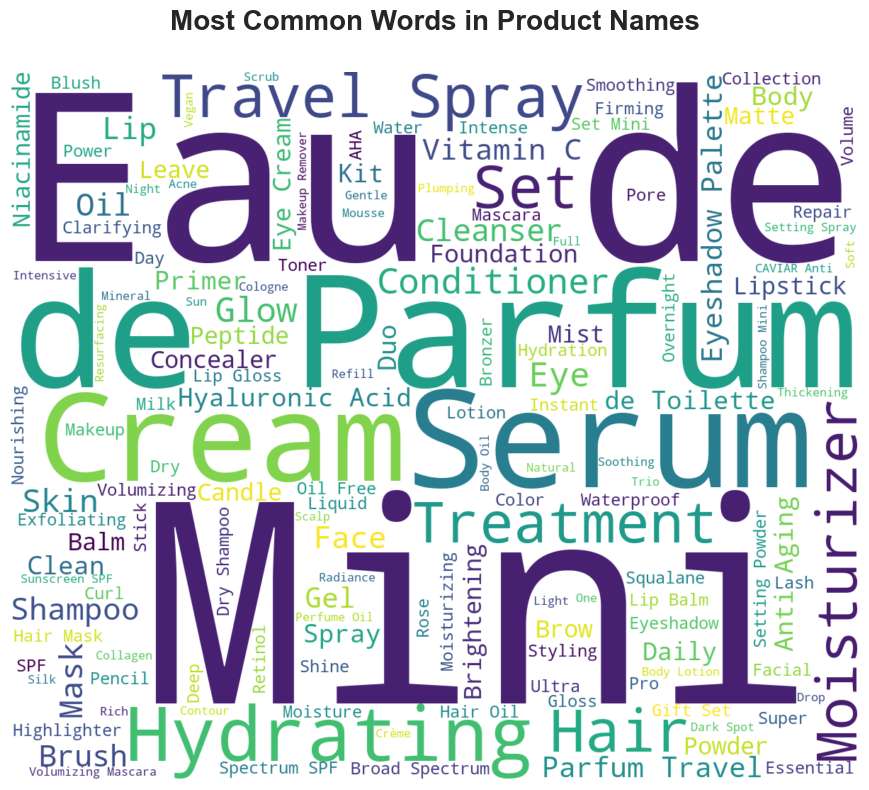

In [29]:
# Concatenate all product names into a single string
all_product_names = " ".join(product_info["product_name"].dropna().values)

# Generate a WordCloud image
wordcloud_products = WordCloud(
    width=1200, 
    height=1000, 
    background_color="white", 
    max_words=150,
    random_state=42
).generate(all_product_names)

# Plot the WordCloud image
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_products, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Product Names", fontsize=20, fontweight="bold", pad=30)

# Display the plot
plt.tight_layout()
plt.show()


### **5.1.9 Product Popularity Analysis Using `loves_count`**

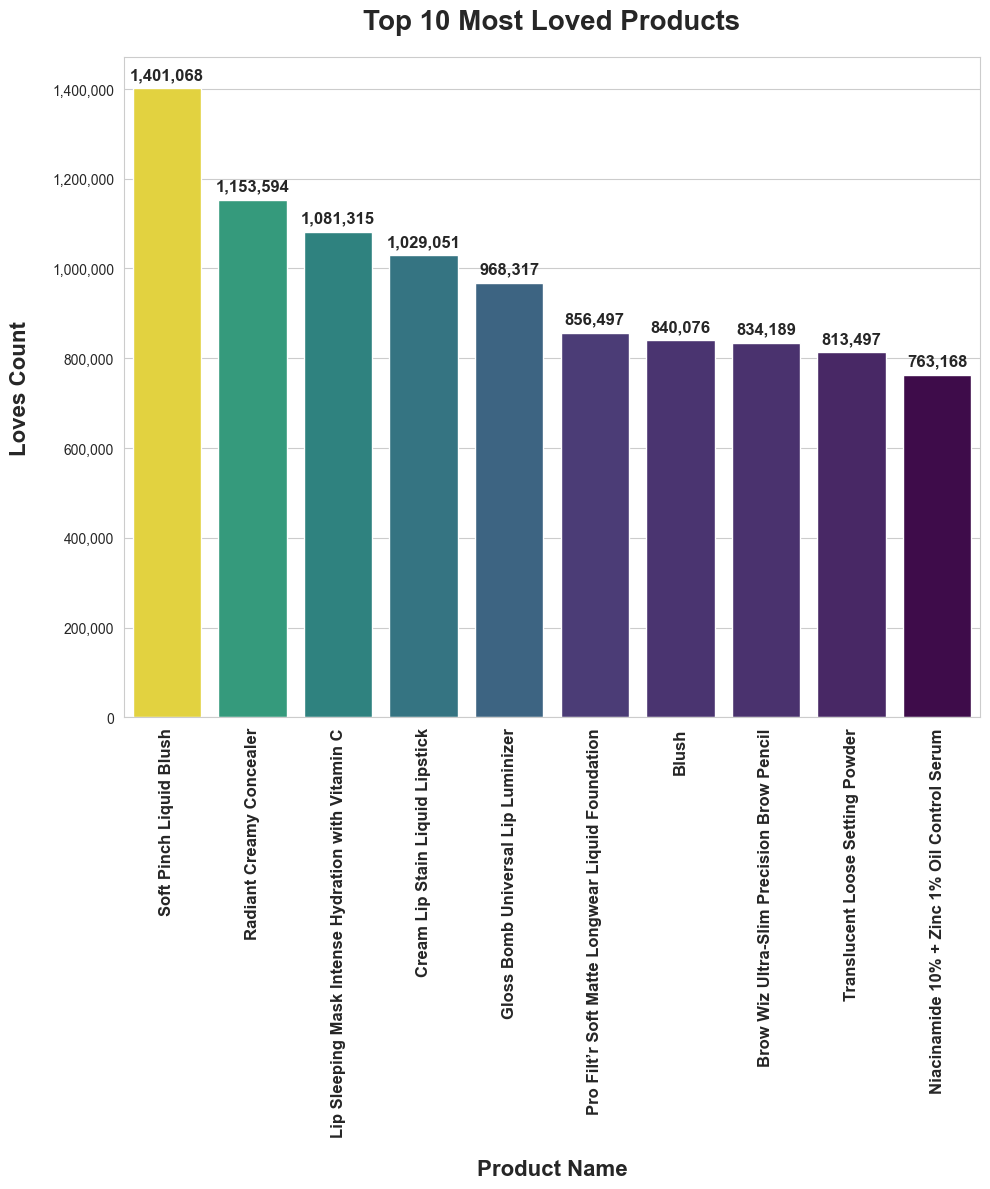

In [30]:
# Custom formatter function
def millions_formatter(x, pos):
    return "{:,.0f}".format(x)

# Sort the products by loves_count and selecting the top 10
top_loved_products = product_info.sort_values(by="loves_count", ascending=False).head(10)

# Plot a bar chart showing the top 10 most loved products
plt.figure(figsize=(10, 12))
ax = sns.barplot(y="loves_count", hue="loves_count", x="product_name", data=top_loved_products, palette="viridis", legend=False)
plt.title("Top 10 Most Loved Products", fontsize=20, fontweight="bold", pad=20)
plt.ylabel("Loves Count", fontsize=16, fontweight="bold", labelpad=16)
plt.xlabel("Product Name", fontsize=16, fontweight="bold", labelpad=16)
plt.xticks(fontsize=12, fontweight="bold", rotation=90)

# Set the formatter for the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add value labels
for p in ax.patches:
    ax.annotate(millions_formatter(p.get_height(), None), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="center", 
                xytext=(0, 10), 
                textcoords="offset points",
                fontweight="bold", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


### **5.1.10 Brand Popularity Analysis Using `rating` (average rating)**

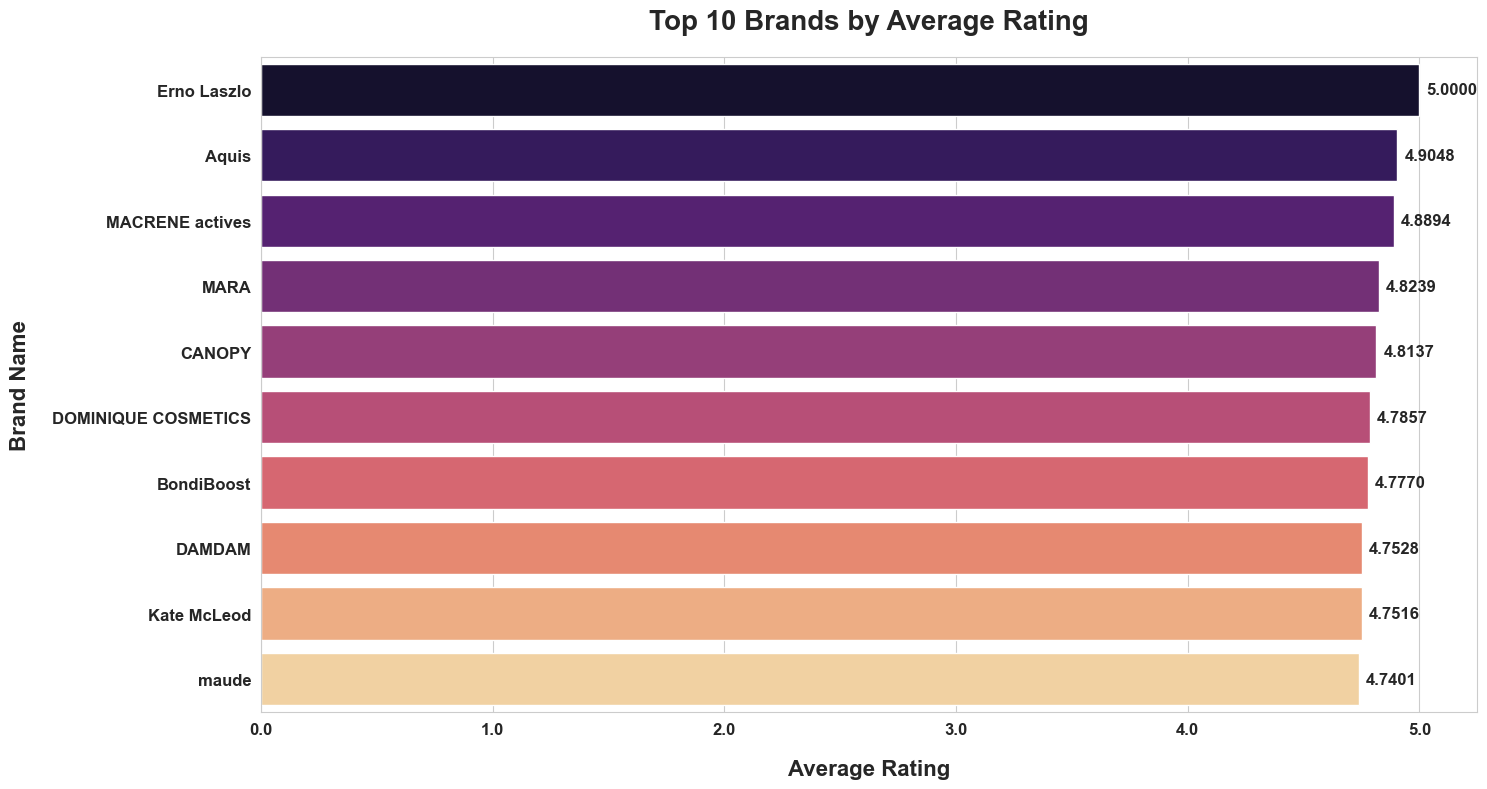

In [31]:
# Aggregate the average rating by brand and sort to get the top brands
brand_avg_rating = product_info.groupby("brand_name")["rating"].mean().sort_values(ascending=False).head(10)

# Reset index to convert the Series to DataFrame for easier plotting
brand_avg_rating = brand_avg_rating.reset_index()

# Plot a bar chart showing the top 10 brands by average rating
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="rating", y="brand_name", hue="brand_name", data=brand_avg_rating, palette="magma")
plt.title("Top 10 Brands by Average Rating", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Average Rating", fontsize=16, fontweight="bold", labelpad=16)
plt.ylabel("Brand Name", fontsize=16, fontweight="bold", labelpad=16)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# Set the formatter for the x-axis to display ratings to one decimal place
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: "{:.1f}".format(x)))

# Add value labels for each bar
for p in ax.patches:
    ax.annotate(format(p.get_width(), ".4f"),
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha="left", va="center",
                xytext=(5, 0),
                textcoords="offset points",
                fontweight="bold", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


### **5.1.11 Price Distribution of Products**

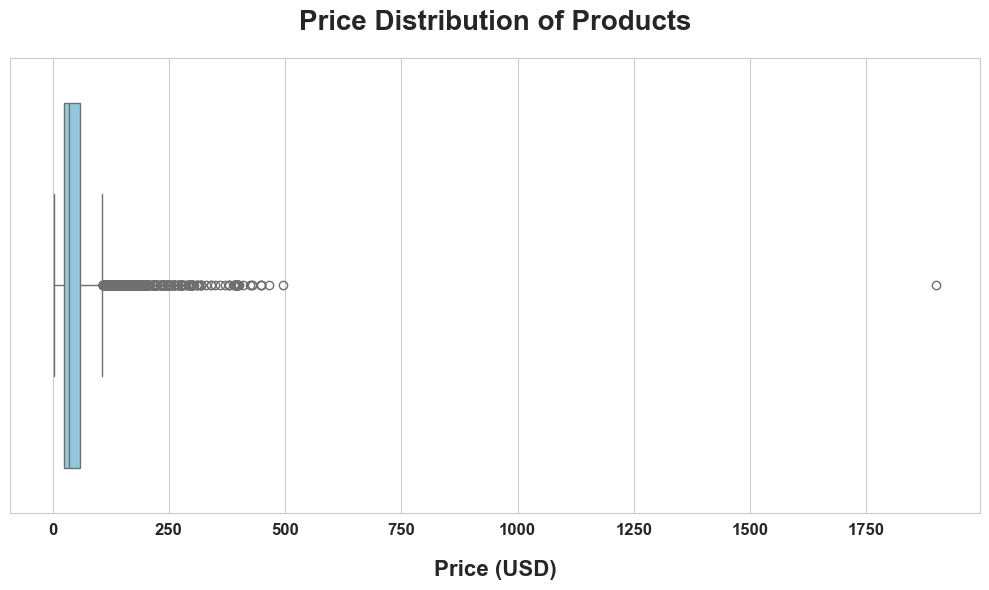

In [32]:
# Plot a box plot for the price distribution of products
plt.figure(figsize=(10, 6))
sns.boxplot(x=product_info["price_usd"], color="skyblue")
plt.title("Price Distribution of Products", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Price (USD)", fontsize=16, fontweight="bold", labelpad=16)
plt.xticks(fontsize=12, fontweight="bold")

# Display the plot
plt.tight_layout()
plt.show()


In [33]:
# Display the top 5 most expensive products
product_info[["product_name", "price_usd"]].sort_values(by="price_usd", ascending=False).head()


,product_name,price_usd
6802,Shani Darden by Déesse PRO LED Light Mask,1900.0
5556,NuFACE Trinity+ & Effective Lip and Eye Attachment,495.0
2162,DRx SpectraLite BodyWare Pro,465.0
3510,Touch Home Permanent Hair Removal Device,449.0
5545,Trinity + Eye and Lip Enhancer Attachment Bundle,449.0


The product **Shani Darden by Déesse PRO LED Light Mask** has an extremely high price of **$1900**.

<img src="images/image_2.png" width="60%" height="60%">

The price of this skincare product on the [<u>official website</u>](https://www.sephora.com/product/shani-darden-by-deesse-pro-led-light-mask-P502216) is indeed **$1900**, so there is no need to delete this data.

### **5.1.12 Most Mentioned Features in Reviews**

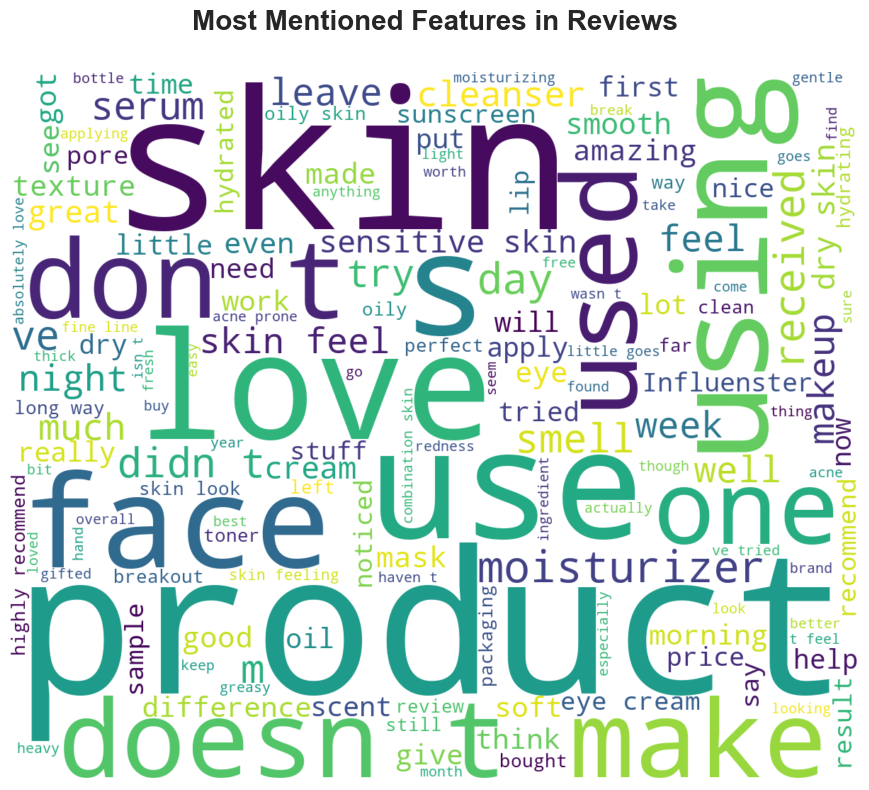

In [34]:
# Sample a subset of reviews and concatenate all review texts into a single string
sample_reviews = all_reviews["review_text"].dropna().sample(frac=0.1, random_state=42) # frac=0.1 is 10% of the data
all_review_texts = " ".join(sample_reviews.values)

# Generate a WordCloud image
wordcloud_reviews = WordCloud(
    width=1200, 
    height=1000, 
    background_color="white", 
    max_words=150,
    random_state=42
).generate(all_review_texts)

# Plot the WordCloud image
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_reviews, interpolation="bilinear")
plt.axis("off")
plt.title("Most Mentioned Features in Reviews", fontsize=20, fontweight="bold", pad=30)

# Display the plot
plt.tight_layout()
plt.show()


### **5.1.13 Skin Type Distribution Among Unique Authors**

In [35]:
# Drop duplicate authors
unique_authors_reviews = all_reviews.drop_duplicates(subset=["author_id"])

# Display the number of unique authors
unique_authors_reviews.shape[0]


503216

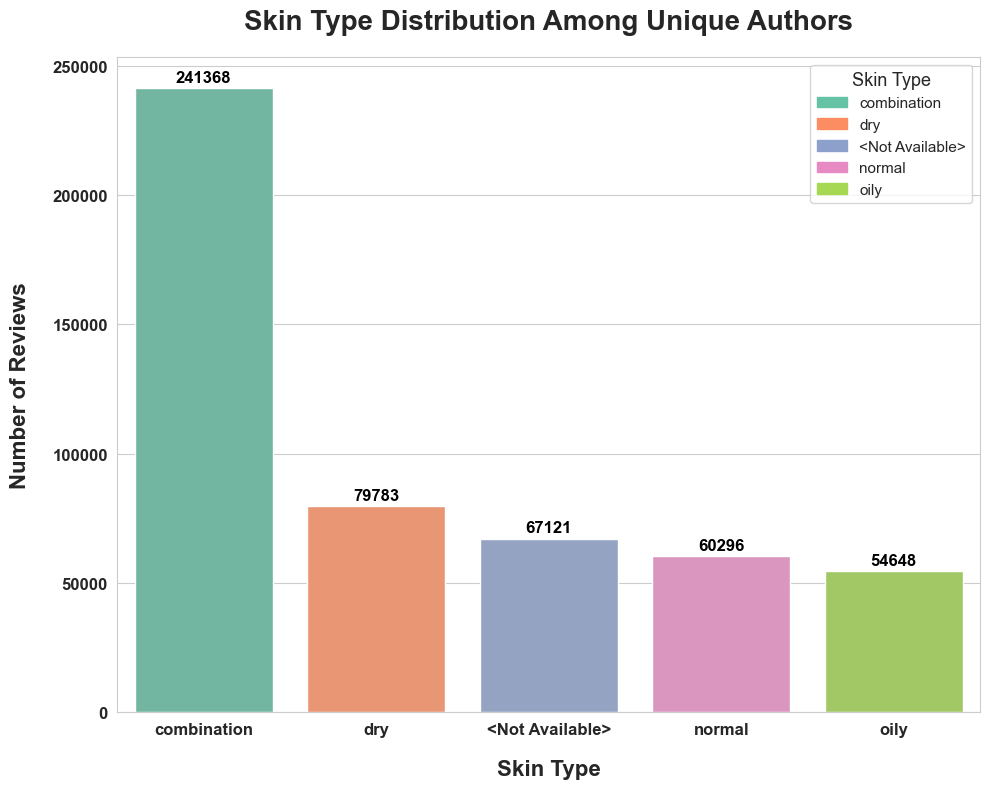

In [36]:
# Replace NaN values in the skin_type column with "<Not Available>"
unique_authors_reviews.loc[:, "skin_type"] = unique_authors_reviews["skin_type"].fillna("<Not Available>")

# Count the frequency of each skin type among unique authors
unique_skin_type_counts = unique_authors_reviews["skin_type"].value_counts()

# Plot a bar chart for the skin type distribution
plt.figure(figsize=(10, 8))
bar = sns.barplot(x=unique_skin_type_counts.index, y=unique_skin_type_counts.values, hue=unique_skin_type_counts.index, palette="Set2")
plt.title("Skin Type Distribution Among Unique Authors", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Skin Type", fontsize=16, fontweight="bold", labelpad=16)
plt.ylabel("Number of Reviews", fontsize=16, fontweight="bold", labelpad=16)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# Add value labels on top of each bar
for index, value in enumerate(unique_skin_type_counts.values):
    plt.text(index, value + 0.01 * max(unique_skin_type_counts.values), str(value),
             color="black", ha="center", fontsize=12, fontweight="bold")

# Create legend
legend_handles = [plt.Rectangle((0,0),1,1, color=color, label=skin_type) for color, skin_type in zip(
    sns.color_palette("Set2", len(unique_skin_type_counts)), unique_skin_type_counts.index)]
plt.legend(handles=legend_handles, title="Skin Type", title_fontsize="13", fontsize="11", loc="upper right")

# Display the plot
plt.tight_layout()
plt.show()


## **5.2 Bivariate / Multivariate Analysis**

### **5.2.1 Correlation Heatmap**

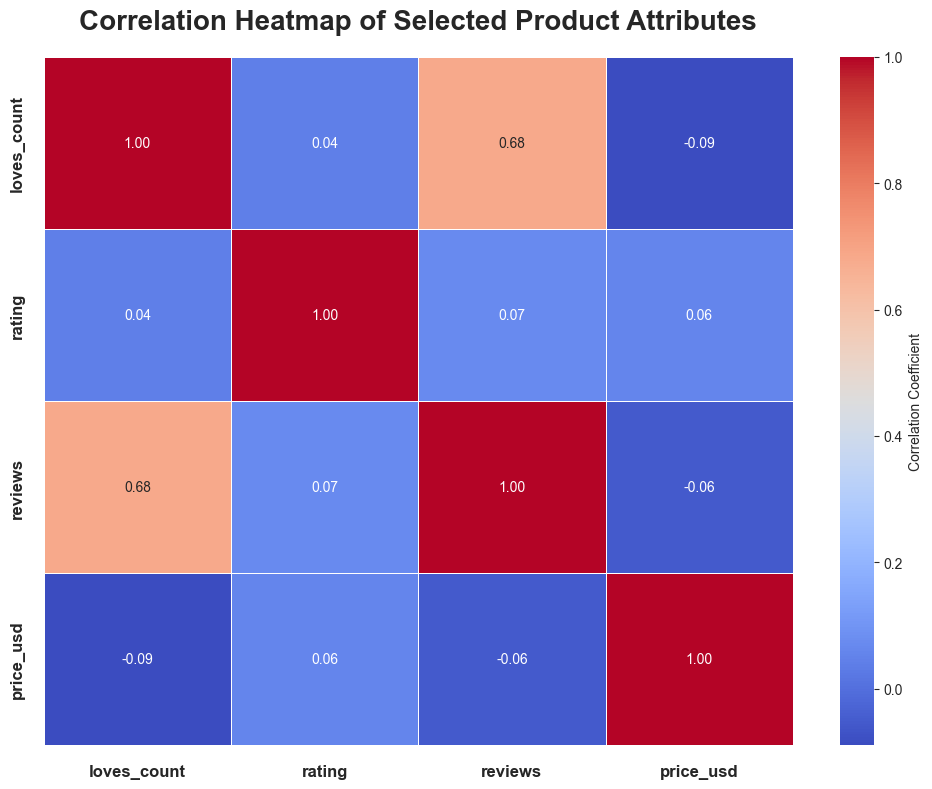

In [37]:
# Select columns for the correlation matrix
columns_for_correlation = ["loves_count", "rating", "reviews", "price_usd"]
correlation_data = product_info[columns_for_correlation].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_data, annot=True, cmap="coolwarm", linewidths=.5,
                      fmt=".2f", cbar_kws={"label": "Correlation Coefficient"})
heatmap.set_title("Correlation Heatmap of Selected Product Attributes", fontsize=20, fontweight="bold", pad=20)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
heatmap.tick_params(axis="x", which="major", pad=10)
heatmap.tick_params(axis="y", which="major", pad=10)

# Display the plot
plt.tight_layout()
plt.show()


The `loves_count` and `reviews` columns have a positive correlation of **`0.68`**.

This indicates that products with more love counts tend to have more reviews.

### **5.2.2 Number of Reviews Over Time**

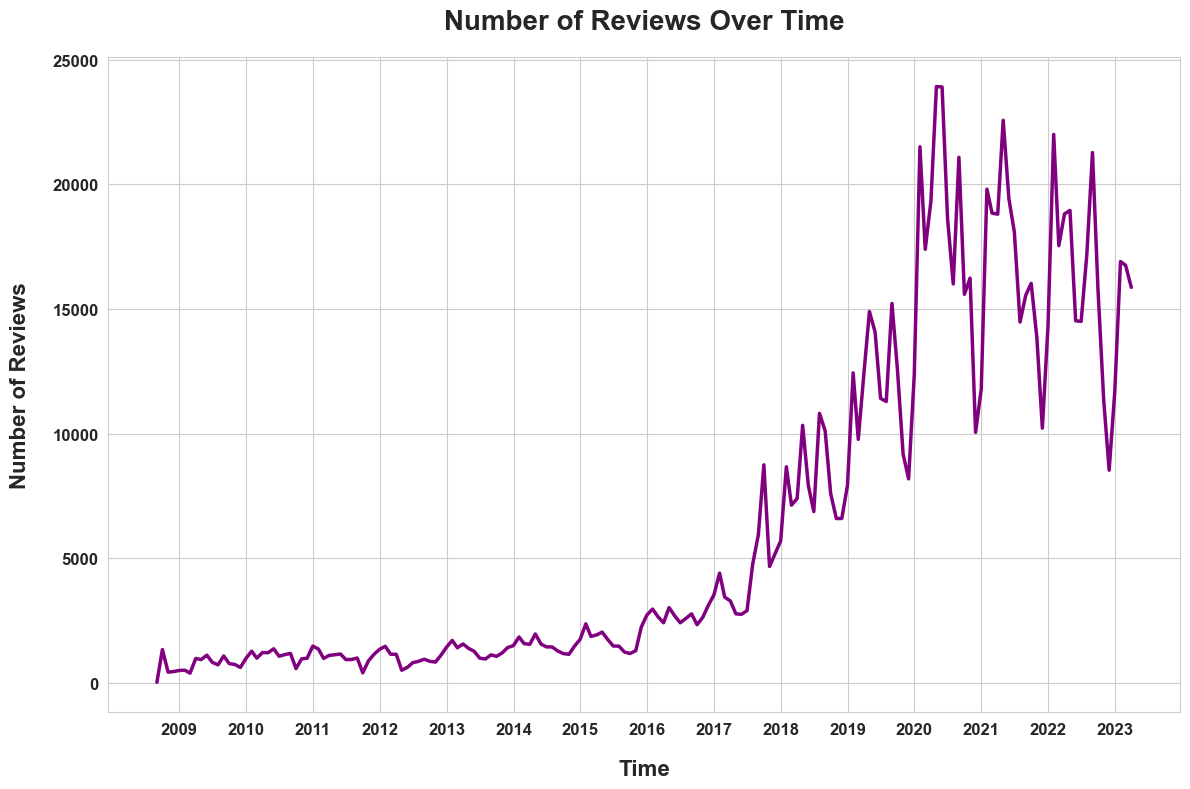

In [38]:
# Convert "submission_time" to datetime format
all_reviews["submission_time"] = pd.to_datetime(all_reviews["submission_time"])

# Grouping by month and counting reviews per month
review_counts = all_reviews.resample("ME", on="submission_time").size()

# Plot a line chart showing the time-based analysis of the number of reviews
plt.figure(figsize=(12, 8))
sns.lineplot(x=review_counts.index, y=review_counts.values, color="purple", linewidth=2.5)
plt.title("Number of Reviews Over Time", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Time", fontsize=16, fontweight="bold", labelpad=16)
plt.ylabel("Number of Reviews", fontsize=16, fontweight="bold", labelpad=16)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# Ensure every year is shown on the x-axis
yearly_ticks = pd.date_range(start=review_counts.index.min(), end=review_counts.index.max(), freq="YS")
plt.xticks(ticks=yearly_ticks, labels=[tick.strftime("%Y") for tick in yearly_ticks])

# Display the plot
plt.tight_layout()
plt.show()


### **5.2.3 Average Product Price by Primary Category**

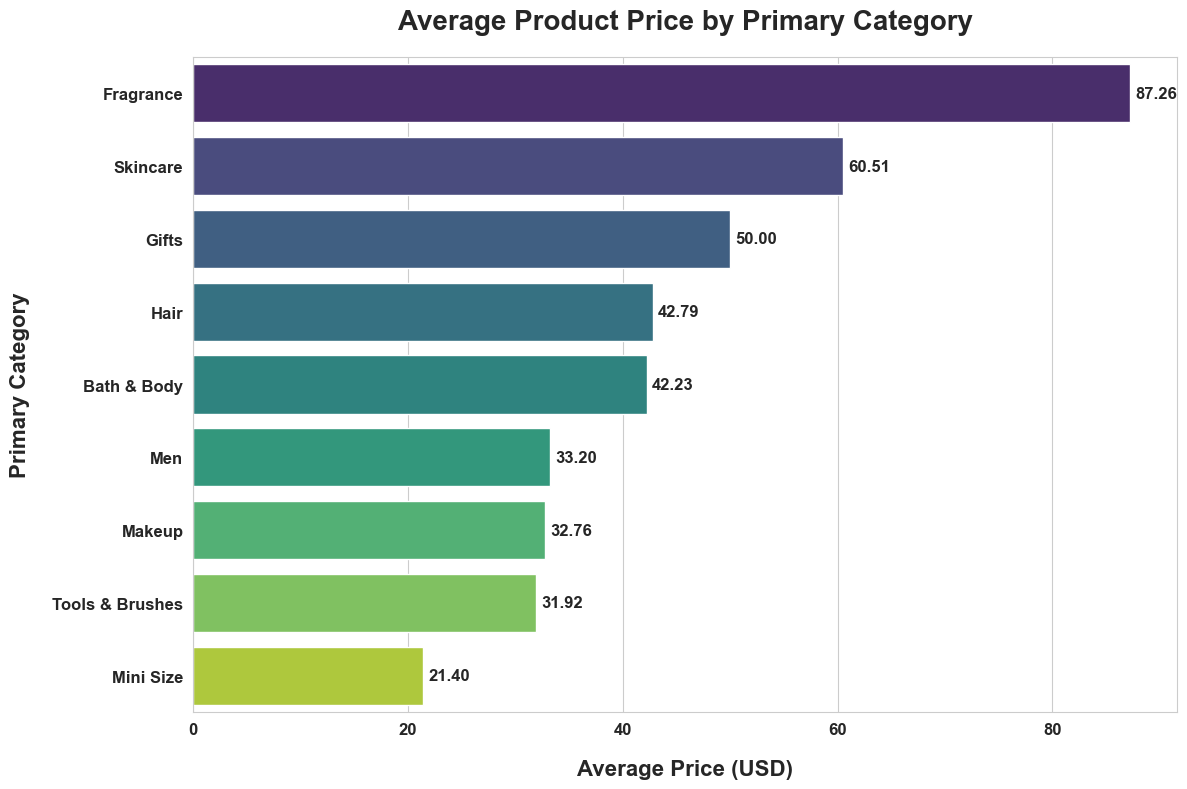

In [39]:
# Calculate the average price of products in each primary category
avg_price_by_category = product_info.groupby("primary_category")["price_usd"].mean().sort_values(ascending=False)

# Plot a bar chart showing the average product price by primary category
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=avg_price_by_category.values, y=avg_price_by_category.index, hue=avg_price_by_category.index, palette="viridis", dodge=False)
plt.title("Average Product Price by Primary Category", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Average Price (USD)", fontsize=16, fontweight="bold", labelpad=16)
plt.ylabel("Primary Category", fontsize=16, fontweight="bold", labelpad=16)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# Add text annotations for each bar
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.5,
             p.get_y() + p.get_height() / 2,
             "{:1.2f}".format(width),
             ha="left",
             va="center",
             fontsize=12, fontweight="bold")

# Display the plot
plt.tight_layout()
plt.show()


# **6.0 Data Preprocessing and Feature Engineering**

## **6.1 Identify Common Columns**

In [40]:
# Find common columns between product_info and all_reviews
common_columns = set(product_info.columns) & set(all_reviews.columns)

# Display the common columns
for i, column in enumerate(common_columns, 1):
    print(f"{i}. {column}")
    

1. price_usd
2. rating
3. brand_name
4. product_name
5. product_id


In [41]:
# Display columns brand_name, price_usd, product_id, product_name, and rating from product_info
product_info_common = product_info[["brand_name", "price_usd", "product_id", "product_name", "rating"]]
product_info_common.head()


,brand_name,price_usd,product_id,product_name,rating
0,19-69,35.0,P473671,Fragrance Discovery Set,3.6364
1,19-69,195.0,P473668,La Habana Eau de Parfum,4.1538
2,19-69,195.0,P473662,Rainbow Bar Eau de Parfum,4.2500
3,19-69,195.0,P473660,Kasbah Eau de Parfum,4.4762
4,19-69,195.0,P473658,Purple Haze Eau de Parfum,3.2308


In [42]:
# Display columns brand_name, price_usd, product_id, product_name, and rating from all_reviews
all_reviews_common = all_reviews[["brand_name", "price_usd", "product_id", "product_name", "rating"]]
all_reviews_common.head()


,brand_name,price_usd,product_id,product_name,rating
0,NUDESTIX,19.0,P504322,Gentle Hydra-Gel Face Cleanser,5
1,LANEIGE,24.0,P420652,Lip Sleeping Mask Intense Hydration with Vitamin C,1
2,LANEIGE,24.0,P420652,Lip Sleeping Mask Intense Hydration with Vitamin C,5
3,LANEIGE,24.0,P420652,Lip Sleeping Mask Intense Hydration with Vitamin C,5
4,LANEIGE,24.0,P420652,Lip Sleeping Mask Intense Hydration with Vitamin C,5


The `rating` column in the `product_info` DataFrame represents the average rating a product receives from authors, while in the `all_reviews` DataFrame, the `rating` column shows the specific rating given by each author after their purchase.

Thus, two of the `rating` columns will be renamed to `average_rating` and `author_rating` respectively to avoid confusion.

## **6.2 Rename `rating` Columns**

In [43]:
# Rename the "rating" column in both DataFrames before merging to avoid confusion
product_info.rename(columns={"rating": "average_rating"}, inplace=True)
all_reviews.rename(columns={"rating": "author_rating"}, inplace=True)


In [44]:
# Delete the DataFrame object to free up memory
del product_info_common
del all_reviews_common


## **6.3 Drop Unwanted Columns**

After reviewing the two DataFrame, drop the unwanted columns (`brand_name`, `price_usd`, `product_name`) in `all_reviews` DataFrame.

In [45]:
# Drop the unwanted columns from all_reviews
columns_to_drop = ["brand_name", "price_usd", "product_name"]
all_reviews.drop(columns=columns_to_drop, inplace=True)


## **6.4 Merge Both DataFrame Using `product_id`**

**Merged DataFrame** - `product_reviews`

In [46]:
# Merge product_info and all_reviews on the `product_id` column
product_reviews = pd.merge(product_info, all_reviews, on="product_id", how="inner")


In [47]:
# Display the first 5 rows of product_reviews
product_reviews.head().transpose()


,0,1,2,3,4
product_id,P439055,P439055,P439055,P439055,P439055
product_name,GENIUS Sleeping Collagen Moisturizer,GENIUS Sleeping Collagen Moisturizer,GENIUS Sleeping Collagen Moisturizer,GENIUS Sleeping Collagen Moisturizer,GENIUS Sleeping Collagen Moisturizer
brand_id,6018,6018,6018,6018,6018
brand_name,Algenist,Algenist,Algenist,Algenist,Algenist
loves_count,33910,33910,33910,33910,33910
average_rating,4.5413,4.5413,4.5413,4.5413,4.5413
reviews,1321.0,1321.0,1321.0,1321.0,1321.0
size,2 oz/ 60 mL,2 oz/ 60 mL,2 oz/ 60 mL,2 oz/ 60 mL,2 oz/ 60 mL
variation_type,Size,Size,Size,Size,Size
variation_value,2 oz/ 60 mL,2 oz/ 60 mL,2 oz/ 60 mL,2 oz/ 60 mL,2 oz/ 60 mL


In [48]:
# Display the shape of product_reviews
print(product_reviews.shape[0], "rows", "and", product_reviews.shape[1], "columns")


1094411 rows and 41 columns


## **6.5 Create Unique and Missing Values Statistics Table**

In [49]:
# Create a DataFrame to display the unique values and missing values in each column of product_reviews
product_reviews_unique_missing = pd.DataFrame({
    "Data Types": product_reviews.dtypes,
    "Unique Values": product_reviews.nunique(),
    "Unique Values (%)": (product_reviews.nunique() / product_reviews.shape[0] * 100).round(2).astype(str) + "%",
    "Missing Values": product_reviews.isnull().sum(),
    "Missing Values (%)": (product_reviews.isnull().sum() / product_reviews.shape[0] * 100).round(2).astype(str) + "%"
})

# Display the unique values and missing values in each column of product_reviews sorted by missing values
product_reviews_unique_missing.sort_values(by="Missing Values", ascending=False)


,Data Types,Unique Values,Unique Values (%),Missing Values,Missing Values (%)
variation_desc,object,11,0.0%,1086128,99.24%
sale_price_usd,float64,28,0.0%,1084658,99.11%
value_price_usd,float64,101,0.01%,1063534,97.18%
child_min_price,float64,111,0.01%,641008,58.57%
child_max_price,float64,133,0.01%,641008,58.57%
helpfulness,float64,3767,0.34%,561592,51.31%
review_title,object,364105,33.27%,310654,28.39%
hair_color,object,7,0.0%,226768,20.72%
eye_color,object,6,0.0%,209628,19.15%
skin_tone,object,14,0.0%,170539,15.58%


## **6.6 Drop Columns with Missing Values (≥50%)**

The following columns had more than 50% missing values overall, so I decided to drop them:
1. `variation_desc`
2. `sale_price_usd`
3. `value_price_usd`
4. `child_min_price`
5. `child_max_price`
6. `helpfulness`

In [50]:
# Drop the columns with more than 50% missing values
product_reviews.drop(columns=product_reviews.columns[product_reviews.isnull().mean() > 0.5], inplace=True)


In [51]:
# Display the shape of product_reviews
print(product_reviews.shape[0], "rows", "and", product_reviews.shape[1], "columns")


1094411 rows and 35 columns


## **6.7 Focus Only on Skincare Products**

My FYP is about a **skincare recommendation system**, and the skincare products are identified in the `primary_category` column, so I will only keep the rows of `primary_category` where the value is **Skincare** only and drop the other rows.

**Note:** As the all_reviews DataFrame only contains reviews given by the author which focus only on skincare products, the **merged DataFrame only contains skincare-related information** overall after merging automatically.

In [52]:
# Drop all rows of data excluding the "Skincare" primary category
skincare_reviews = product_reviews[product_reviews["primary_category"] == "Skincare"]


In [53]:
# Display the shape of skincare_reviews
print(skincare_reviews.shape[0], "rows", "and", skincare_reviews.shape[1], "columns")


1094411 rows and 35 columns


In [54]:
# Delete the product_reviews DataFrame to free up memory
del product_reviews


## **6.8 Merge the `review_title` and `review_text` Columns**

In [55]:
# Display the missing values in the "review_title" and "review_text" columns
skincare_reviews[["review_title", "review_text"]].isnull().sum()


review_title    310654
review_text       1444
dtype: int64

In [56]:
# Fill the missing values in the "review_title" and "review_text" columns with ("")
skincare_reviews.fillna({"review_title": "", "review_text": ""}, inplace=True)


In [57]:
# Display the missing values in the "review_title" and "review_text" columns
skincare_reviews[["review_title", "review_text"]].isnull().sum()


review_title    0
review_text     0
dtype: int64

In [58]:
# Display the first 5 rows of "review_title" and "review_text" in skincare_reviews
skincare_reviews[["review_title", "review_text"]].head()


,review_title,review_text
0,Must have,"Ever since I bought this, I noticed that my skin is softer and I wake up looking glowing. This i..."
1,Luxurious treat I use nightly.,This cream feels so silky and luxurious! I feel like I’m treating myself when I use it along wit...
2,Algenist doesn't miss,This is the fourth Algenist product I’ve gotten and absolutely LOVED. I usually can’t wear thick...
3,Incredible Collagen Sleeping Moisturizer! Luxury!,I’ve been using this for 2 months now and I can’t tell you enough how amazing it is. Yes it’s a ...
4,,"I don’t like the smell. It pills on your skin if you have another moisturizer on, didn’t see res..."


In [59]:
# Merge the "review_title" and "review_text" columns back to the "review_text" column and drop the "review_title" column
skincare_reviews["review_text"] = skincare_reviews["review_title"] + " " + skincare_reviews["review_text"]
skincare_reviews.drop(columns="review_title", inplace=True)


In [60]:
# Display the first 5 rows of review_text in skincare_reviews
skincare_reviews[["review_text"]].head()


,review_text
0,"Must have Ever since I bought this, I noticed that my skin is softer and I wake up looking glowi..."
1,Luxurious treat I use nightly. This cream feels so silky and luxurious! I feel like I’m treating...
2,Algenist doesn't miss This is the fourth Algenist product I’ve gotten and absolutely LOVED. I us...
3,Incredible Collagen Sleeping Moisturizer! Luxury! I’ve been using this for 2 months now and I ca...
4,"I don’t like the smell. It pills on your skin if you have another moisturizer on, didn’t see re..."


In [61]:
# Display the shape of skincare_reviews
print(skincare_reviews.shape[0], "rows", "and", skincare_reviews.shape[1], "columns")


1094411 rows and 34 columns


## **6.9 Basic Text Preprocessing**

In [62]:
# Temporary configuration
pd.set_option("display.max_colwidth", 200)


### **6.9.1 Remove HTML Contents**

In [63]:
# Function to remove specific HTML tags and decode HTML entities
def remove_html_contents(text):
    if not text:
        return text

    # Decode HTML entities
    text = html.unescape(text)
    
    # Remove specific HTML tags: <br>, <a>, <hr> and their closing parts
    text = re.sub(r"<br\s*/?>", "", text)               # remove all variations of <br> tag
    text = re.sub(r"<a\s.*?>(.*?)<\/a>", r"\1", text)   # remove <a> tags but keep the text inside
    text = re.sub(r"<\/?hr\s*/?>", "", text)            # remove all variations of <hr> tag
    
    return text

# Apply the function to the "review_text" column and create a comparison column
skincare_reviews["cleaned_text_html"] = skincare_reviews["review_text"].apply(remove_html_contents)

# Identify rows where changes have occurred
changed_rows_html = skincare_reviews["review_text"] != skincare_reviews["cleaned_text_html"]


In [64]:
# Display how many rows have been cleaned
changed_rows_html.sum()


17

In [65]:
# Display the rows to verify HTML contents removal
skincare_reviews.loc[changed_rows_html, ["review_text", "cleaned_text_html"]].head(10)


,review_text,cleaned_text_html
131136,I usually fluctuate between #2 &#3 and #3 is by far the one that works the best. My face feels so clean and fresh after I use this. I wouldn’t be able to live without this product along with my c...,I usually fluctuate between #2 and #3 is by far the one that works the best. My face feels so clean and fresh after I use this. I wouldn’t be able to live without this product along with my clar...
136734,great for sensitive skin I received a sample of&nbsp;Clinique Blackhead Solutions 7 Day Deep Pore Cleanse &amp; Scrub in a voxbox. I have super sensitive skin and was nervous about incorporating a...,great for sensitive skin I received a sample of Clinique Blackhead Solutions 7 Day Deep Pore Cleanse & Scrub in a voxbox. I have super sensitive skin and was nervous about incorporating a new prod...
165096,"Truly a surprise! First, I was given this product in exchange for a review, but all thoughts and opinions are my own.<br><br>When I first opened this, I instantly smelled citrus. I was a little wo...","Truly a surprise! First, I was given this product in exchange for a review, but all thoughts and opinions are my own.When I first opened this, I instantly smelled citrus. I was a little worried, b..."
165162,Shockingly Cramazing This stuff is AMAZING so far.I put it on for the first time last night and had that nice light acid feel where it feels a little tingly so you know it’s working.It’s got a gre...,Shockingly Cramazing This stuff is AMAZING so far.I put it on for the first time last night and had that nice light acid feel where it feels a little tingly so you know it’s working.It’s got a gre...
174572,I have received&nbsp;this product a couple of weeks ago just before my trip to Costa Rica. So the timing was perfect. This product is lightweight and fast absorbing.&nbsp; Perfect for people like...,I have received this product a couple of weeks ago just before my trip to Costa Rica. So the timing was perfect. This product is lightweight and fast absorbing. Perfect for people like me who ha...
208841,Amazing! I love this product! I received the Color Correcting Treatment in a set of products to try for free from Influenster. I always have dryness around my nose that is of course red after tryi...,Amazing! I love this product! I received the Color Correcting Treatment in a set of products to try for free from Influenster. I always have dryness around my nose that is of course red after tryi...
213876,Amazing! I love this product! I received the Color Correcting Treatment in a set of products to try for free from Influenster. I always have dryness around my nose that is of course red after tryi...,Amazing! I love this product! I received the Color Correcting Treatment in a set of products to try for free from Influenster. I always have dryness around my nose that is of course red after tryi...
216597,Favorite product in the line I received the Tiger Grass Cream in a free set of products to try from Influenster. This was by far my favorite product! I adopted it into my nighttime routine and wou...,Favorite product in the line I received the Tiger Grass Cream in a free set of products to try from Influenster. This was by far my favorite product! I adopted it into my nighttime routine and wou...
217880,"Wonderful! I received this Serum for free from Influenster to review. I love the scent and the bottle. As you unscrew the bottle, the button applicator pops up and as you close it, the button clos...","Wonderful! I received this Serum for free from Influenster to review. I love the scent and the bottle. As you unscrew the bottle, the button applicator pops up and as you close it, the button clos..."
222599,"Maybe not necessary I received this Calming Mist as a set of free products to try from Influenster. This mist is nice but ultimately feels unnecessary. The bottle and mister are perfect. I mean, o...","Maybe not necessary I received this Calming Mist as a set of free products to try from Influen

### **6.9.2 Remove URLs**

In [66]:
# Function to remove URLs
def remove_urls(text):
    pattern = r"\b(?:http|ftp|https)://\S+|www\.\S+\b"
    return re.sub(pattern, "", text) if text else text

# Apply the function to the "cleaned_text_html" column for further cleaning
skincare_reviews["cleaned_text_url"] = skincare_reviews["cleaned_text_html"].apply(remove_urls)

# Identify rows where changes have occurred
changed_rows_url = skincare_reviews["cleaned_text_html"] != skincare_reviews["cleaned_text_url"]


In [67]:
# Display how many rows have been cleaned
changed_rows_url.sum()


42

In [68]:
# Display the rows to verify URLs removal
skincare_reviews.loc[changed_rows_url, ["cleaned_text_html", "cleaned_text_url"]].head(10)


,cleaned_text_html,cleaned_text_url
98979,https://www.youtube.com/watch?v=2aM9FpdGnDQ https://www.youtube.com/watch?v=2aM9FpdGnDQ,
100784,"Takes it ALL Off I wear Shiseido Ultimate Sun Protection Lotion* to protect my fair/light skin. It’s great, but it sticks to skin like tarnish on your best silver. This Clinique balm is the only t...","Takes it ALL Off I wear Shiseido Ultimate Sun Protection Lotion* to protect my fair/light skin. It’s great, but it sticks to skin like tarnish on your best silver. This Clinique balm is the only t..."
103355,https://www.youtube.com/watch?v=2aM9FpdGnDQ https://www.youtube.com/watch?v=2aM9FpdGnDQ,
105160,"Takes it ALL Off I wear Shiseido Ultimate Sun Protection Lotion* to protect my fair/light skin. It’s great, but it sticks to skin like tarnish on your best silver. This Clinique balm is the only t...","Takes it ALL Off I wear Shiseido Ultimate Sun Protection Lotion* to protect my fair/light skin. It’s great, but it sticks to skin like tarnish on your best silver. This Clinique balm is the only t..."
110848,"Great Daily Face Wash I enjoy this facial soap. After using some harsh popular acne washes, I decided to take it easy on my skin. I thought that I might see some blemishes seeing as how this is a ...","Great Daily Face Wash I enjoy this facial soap. After using some harsh popular acne washes, I decided to take it easy on my skin. I thought that I might see some blemishes seeing as how this is a ..."
146771,Queen of Sunscreen!! This product is something different from all other sunscreen and became my favorite sunscreen ever. Light liquidy texture but not sticky or greasy. Soft as serum and works wel...,Queen of Sunscreen!! This product is something different from all other sunscreen and became my favorite sunscreen ever. Light liquidy texture but not sticky or greasy. Soft as serum and works wel...
300242,"No Plastics in This Product - Do Your Research I have been using Green Clean as a first cleanse for years. I have not received any free products, and have purchased each jar with my own money. It ...","No Plastics in This Product - Do Your Research I have been using Green Clean as a first cleanse for years. I have not received any free products, and have purchased each jar with my own money. It ..."
303771,"Seriously the BEST CLEANSING BALM For a decade now, I’ve used a 3-step cleansing routine. It’s always an oil, cream, then gel cleanser. To say I’m a fanatic about cleansing is an understatement.So...","Seriously the BEST CLEANSING BALM For a decade now, I’ve used a 3-step cleansing routine. It’s always an oil, cream, then gel cleanser. To say I’m a fanatic about cleansing is an understatement.So..."
306411,"No Plastics in This Product - Do Your Research I have been using Green Clean as a first cleanse for years. I have not received any free products, and have purchased each jar with my own money. It ...","No Plastics in This Product - Do Your Research I have been using Green Clean as a first cleanse for years. I have not received any free products, and have purchased each jar with my own money. It ..."
309940,"Seriously the BEST CLEANSING BALM For a decade now, I’ve used a 3-step cleansing routine. It’s always an oil, cream, then gel cleanser. To say I’m a fanatic about cleansing is an understatement.So...","Seriously the BEST CLEANSING BALM For a decade now, I’ve used a 3-step cleansing routine. It’s always an oil, cream, then gel cleanser. To say I’m a fanatic about cleansing is an understatement.So..."


### **6.9.3 Remove Email Addresses**

In [69]:
# Function to remove email addresses
def remove_emails(text):
    return re.sub(r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b", "", text) if text else text

# Apply the function to the "cleaned_text_url" column for further cleaning
skincare_reviews["cleaned_text_email"] = skincare_reviews["cleaned_text_url"].apply(remove_emails)

# Identify rows where changes have occurred
changed_rows_email = skincare_reviews["cleaned_text_url"] != skincare_reviews["cleaned_text_email"]


In [70]:
# Display how many rows have been cleaned
changed_rows_email.sum()


4

In [71]:
# Display the rows to verify email addresses removal
skincare_reviews.loc[changed_rows_email, ["cleaned_text_url", "cleaned_text_email"]].head()


,cleaned_text_url,cleaned_text_email
65192,Refreshing and works well if I use with new product line Bioce from the Trump Network.mada1219@hotmail.com,Refreshing and works well if I use with new product line Bioce from the Trump
388124,AWESOME LOVE THIS TONER.If any of you have a finished bottle of this please email me! taraahmadi7@gmail.com I absolutely love the bottle and need a few more as dec!,AWESOME LOVE THIS TONER.If any of you have a finished bottle of this please email me! I absolutely love the bottle and need a few more as dec!
492410,"Radient skin JLO glow serum gives my skin the radiance it needs to rid the dull tired looking skin. It absorbs well, a little does alot and it’s easy to apply. That Fresh Take eye cream has slight...","Radient skin JLO glow serum gives my skin the radiance it needs to rid the dull tired looking skin. It absorbs well, a little does alot and it’s easy to apply. That Fresh Take eye cream has slight..."
899119,"Great Product...NOT reformulating! After reading the below review, I was concerned to try the Sunday Riley products but before I gave up on them I wanted to check the facts. I emailed Sunday Riley...","Great Product...NOT reformulating! After reading the below review, I was concerned to try the Sunday Riley products but before I gave up on them I wanted to check the facts. I emailed Sunday Riley..."


### **6.9.4 Remove Extra Spaces**

In [72]:
# Function to remove extra spaces
def remove_extra_spaces(text):
    return " ".join(text.split()) if text else text

# Apply the function to the "cleaned_text_email" column for the final cleaning step
skincare_reviews["cleaned_text"] = skincare_reviews["cleaned_text_email"].apply(remove_extra_spaces)

# Identify rows where changes have occurred
changed_rows_spaces = skincare_reviews["cleaned_text_email"] != skincare_reviews["cleaned_text"]


In [73]:
# Display how many rows have been cleaned
changed_rows_spaces.sum()


405214

### **6.9.5 Final Verification and Cleanup of Skincare Reviews Data**

In [74]:
# Revert the temporary configuration
pd.set_option("display.max_colwidth", 100)


In [75]:
# Replace the original "review_text" column with the fully cleaned "cleaned_text" column
skincare_reviews["review_text"] = skincare_reviews["cleaned_text"]

# Drop the intermediate columns used for verification
skincare_reviews.drop(columns=["cleaned_text_html",
                               "cleaned_text_url",
                               "cleaned_text_email",
                               "cleaned_text"], inplace=True)


In [76]:
# Check for missing values in the "cleaned_text" column
skincare_reviews["review_text"].isnull().sum()


0

In [77]:
# Display the first 5 rows of skincare_reviews
skincare_reviews.head().transpose()


,0,1,2,3,4
product_id,P439055,P439055,P439055,P439055,P439055
product_name,GENIUS Sleeping Collagen Moisturizer,GENIUS Sleeping Collagen Moisturizer,GENIUS Sleeping Collagen Moisturizer,GENIUS Sleeping Collagen Moisturizer,GENIUS Sleeping Collagen Moisturizer
brand_id,6018,6018,6018,6018,6018
brand_name,Algenist,Algenist,Algenist,Algenist,Algenist
loves_count,33910,33910,33910,33910,33910
average_rating,4.5413,4.5413,4.5413,4.5413,4.5413
reviews,1321.0,1321.0,1321.0,1321.0,1321.0
size,2 oz/ 60 mL,2 oz/ 60 mL,2 oz/ 60 mL,2 oz/ 60 mL,2 oz/ 60 mL
variation_type,Size,Size,Size,Size,Size
variation_value,2 oz/ 60 mL,2 oz/ 60 mL,2 oz/ 60 mL,2 oz/ 60 mL,2 oz/ 60 mL


## **6.10 Data Reduction**

1. Keep reviews **from 2022 onwards**.
2. Filter out authors with minimal submissions to mitigate the **cold start problem**.

**Note:** Initially, I could have kept more rows of review data or older data to provide more personalized recommendations to authors. However, in a later implementation of the cosine similarity matrix for the content-based filtering approach, the computations would have been very computationally intensive and resulted in very high memory consumption, which would have led to memory errors. Therefore, I decided to keep only about 50000 rows of the latest data.

In [78]:
# Convert "submission_time" to datetime format
skincare_reviews["submission_time"] = pd.to_datetime(skincare_reviews["submission_time"])


### **6.10.1 Keep Only Most Recent Data (Temporal Filtering)**

In [79]:
# Resample the data by year and count the number of reviews per year
yearly_review_counts = skincare_reviews.resample("YE", on="submission_time").size()

# Display the yearly review counts with years as the index
yearly_review_counts.index = yearly_review_counts.index.year
yearly_review_counts


submission_time
2008      2761
2009      9709
2010     13485
2011     12417
2012     11800
2013     15621
2014     18224
2015     21590
2016     33137
2017     54592
2018     97996
2019    143860
2020    215449
2021    202012
2022    192227
2023     49531
dtype: int64

In [80]:
# Filter reviews to keep only those from 2022 onwards
skincare_reviews = skincare_reviews[skincare_reviews["submission_time"].dt.year >= 2022]

# Display the shape of the updated skincare_reviews
print(f"{skincare_reviews.shape[0]} rows and {skincare_reviews.shape[1]} columns")


241758 rows and 34 columns


### **6.10.2 Mitigate Cold Start Problem**

In [81]:
# Calculate the number of reviews each author has contributed since 2022
author_review_counts = skincare_reviews["author_id"].value_counts()
print(author_review_counts)


author_id
2330399812     97
6735103542     93
10690040573    93
2841543991     91
5377133952     87
               ..
21552655780     1
2691299275      1
1512585801      1
1895537645      1
2130031611      1
Name: count, Length: 107058, dtype: int64


In [82]:
# Set a minimum number of reviews per author to be considered
min_reviews = 12
authors_with_enough_reviews = author_review_counts[author_review_counts >= min_reviews].index

# Filter reviews to include only those from authors who have met the minimum review count
skincare_reviews = skincare_reviews[skincare_reviews["author_id"].isin(authors_with_enough_reviews)]

# Display the shape of the updated skincare_reviews
print(f"{skincare_reviews.shape[0]} rows and {skincare_reviews.shape[1]} columns")


51069 rows and 34 columns


## **6.11 Emojis Handling and Removal**

In [83]:
# Define the regex pattern for emojis
emoji_pattern = re.compile("["
                           u"\U00002300-\U000023FF"  # miscellaneous technical
                           u"\U000024C2-\U0001F251"  # enclosed characters
                           u"\U00002500-\U0000257F"  # box drawing
                           u"\U000025A0-\U000025FF"  # geometric shapes
                           u"\U00002600-\U000026FF"  # miscellaneous symbols
                           u"\U00002700-\U000027BF"  # dingbats
                           u"\U00002702-\U000027B0"  # dingbats continuation
                           u"\U00002B50-\U00002B59"  # additional stars and asterisks
                           u"\U0001F000-\U0001F02F"  # mahjong tiles
                           u"\U0001F0A0-\U0001F0FF"  # playing cards
                           u"\U0001F100-\U0001F1FF"  # enclosed alphanumeric supplement
                           u"\U0001F200-\U0001F2FF"  # enclosed ideographic supplement
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # geometric shapes extended
                           u"\U0001F800-\U0001F8FF"  # supplemental arrows-c
                           u"\U0001F900-\U0001F9FF"  # supplemental symbols and pictographs
                           u"\U0001FA00-\U0001FA6F"  # chess symbols
                           u"\U0001FA70-\U0001FAFF"  # symbols and pictographs extended-a
                           "]+", flags=re.UNICODE)


In [84]:
# Function to check if a text contains emojis
def contains_emoji(text):
    return emoji_pattern.search(text) is not None if isinstance(text, str) else False

# Function to extract emojis from a text
def extract_emojis(text):
    return emoji_pattern.findall(text) if isinstance(text, str) else []


In [85]:
# Count the number of reviews that contain emojis in the "review_text" column
skincare_reviews["review_text"].apply(contains_emoji).sum()


163

In [86]:
# Apply the extract_emojis function to each review in skincare_reviews and concatenate lists from all rows
all_emojis = skincare_reviews["review_text"].apply(extract_emojis).sum()


In [87]:
# Find unique emojis from all extracted emojis
unique_emojis = set(all_emojis)

# Print unique emojis in a numbered format
for i, emoji in enumerate(sorted(unique_emojis), start=1):
    print(f"{i}. {emoji}")
    

1. ☀️
2. ☺︎
3. ♡︎☀︎︎
4. ♥️
5. ✅
6. ✔️
7. ✨
8. ✨✨
9. ✨️
10. ✨🖤
11. ❌
12. ❤
13. ❤︎
14. ❤️
15. ❤️❤️❤️
16. ➡️
17. ⭐️
18. ️
19. ﻿
20. ！
21. （
22. ）
23. ￼
24. ￼￼
25. ￼￼￼
26. ￼￼￼￼
27. 𝔸𝕝𝕘𝕒𝕖
28. 𝔹𝕚𝕠𝕃𝕦𝕞𝕚𝕟
29. 𝔼𝕟𝕫𝕪𝕞𝕖
30. 𝔼𝕪𝕖
31. 𝔽𝕒𝕔𝕖
32. 𝕆𝕚𝕝
33. 𝕊𝕖𝕣𝕦𝕞
34. 𝕍𝕚𝕥𝕒𝕞𝕚𝕟
35. 𝕖𝕣𝕗𝕠𝕣𝕞𝕒𝕟𝕔𝕖
36. 𝕚𝕘𝕙
37. 𝕝𝕖𝕒𝕟𝕤𝕚𝕟𝕘
38. 𝕠𝕟𝕔𝕖𝕟𝕥𝕣𝕒𝕥𝕖
39. 𝕣𝕖𝕒𝕞
40. 🆃🅷🅾🆄🅶🅷🆃🆂
41. 🌊
42. 🌞
43. 🌫️
44. 🍋
45. 🍍
46. 🍎
47. 🍯💛
48. 🏆
49. 👋
50. 👋🏼
51. 👌🏻
52. 👍
53. 👍🏼
54. 💖
55. 💗
56. 💛
57. 💜
58. 💞
59. 💧
60. 📌🅼🆈
61. 🔥
62. 😂
63. 😄
64. 😅
65. 😆
66. 😊
67. 😍
68. 😍😍
69. 😏
70. 😓
71. 😞
72. 😢
73. 😢💔
74. 😬
75. 😭
76. 😶
77. 😻
78. 🙂
79. 🙃
80. 🙌🏼
81. 🛍
82. 🛍️
83. 🤌🏼
84. 🤌🏽
85. 🤓
86. 🤩
87. 🥰
88. 🥰🥰🥰🥰
89. 🥺
90. 🧡
91. 🫣
92. 🫶💚


In [88]:
# Remove emojis from review_text in skincare_reviews
skincare_reviews["review_text"] = skincare_reviews["review_text"].apply(lambda x: emoji_pattern.sub(r"", x))


In [89]:
# Check again if emojis are present in the review_text
skincare_reviews["review_text"].apply(contains_emoji).sum()


0

In [90]:
# Display the missing values in the "review_text" columns
skincare_reviews[["review_text"]].isnull().sum()


review_text    0
dtype: int64

## **6.12 Feature Selection**

**Note:** Display a few rows of data to determine which columns are not required for analysis, and then drop them.

In [91]:
# Display the first 5 rows of skincare_reviews
skincare_reviews.head().transpose()


,1327,1331,1332,1333,1338
product_id,P421277,P421277,P421277,P421277,P421277
product_name,GENIUS Liquid Collagen Serum,GENIUS Liquid Collagen Serum,GENIUS Liquid Collagen Serum,GENIUS Liquid Collagen Serum,GENIUS Liquid Collagen Serum
brand_id,6018,6018,6018,6018,6018
brand_name,Algenist,Algenist,Algenist,Algenist,Algenist
loves_count,67870,67870,67870,67870,67870
average_rating,4.0259,4.0259,4.0259,4.0259,4.0259
reviews,1159.0,1159.0,1159.0,1159.0,1159.0
size,1 oz / 30 mL,1 oz / 30 mL,1 oz / 30 mL,1 oz / 30 mL,1 oz / 30 mL
variation_type,Size,Size,Size,Size,Size
variation_value,1 oz / 30 mL,1 oz / 30 mL,1 oz / 30 mL,1 oz / 30 mL,1 oz / 30 mL


In [92]:
# Drop the unwanted columns which are not required for analysis
columns_to_drop = [
    "brand_id", "loves_count", "reviews", "size", "variation_type", "variation_value", "new",
    "online_only", "out_of_stock", "sephora_exclusive", "primary_category", "child_count",
    "is_recommended", "total_feedback_count", "total_neg_feedback_count", "total_pos_feedback_count",
    "submission_time", "skin_tone", "skin_type", "eye_color", "hair_color"
]

skincare_reviews.drop(columns=columns_to_drop, inplace=True)


In [93]:
# Display the first 5 rows of skincare_reviews
skincare_reviews.head().transpose()


,1327,1331,1332,1333,1338
product_id,P421277,P421277,P421277,P421277,P421277
product_name,GENIUS Liquid Collagen Serum,GENIUS Liquid Collagen Serum,GENIUS Liquid Collagen Serum,GENIUS Liquid Collagen Serum,GENIUS Liquid Collagen Serum
brand_name,Algenist,Algenist,Algenist,Algenist,Algenist
average_rating,4.0259,4.0259,4.0259,4.0259,4.0259
ingredients,"['Collagen (Vegan)*, Water (Aqua, Eau), Propanediol, Isononyl Isononanoate, Butylene Glycol, Gly...","['Collagen (Vegan)*, Water (Aqua, Eau), Propanediol, Isononyl Isononanoate, Butylene Glycol, Gly...","['Collagen (Vegan)*, Water (Aqua, Eau), Propanediol, Isononyl Isononanoate, Butylene Glycol, Gly...","['Collagen (Vegan)*, Water (Aqua, Eau), Propanediol, Isononyl Isononanoate, Butylene Glycol, Gly...","['Collagen (Vegan)*, Water (Aqua, Eau), Propanediol, Isononyl Isononanoate, Butylene Glycol, Gly..."
price_usd,115.0,115.0,115.0,115.0,115.0
limited_edition,0,0,0,0,0
highlights,"['Vegan', 'Good for: Loss of firmness', 'Collagen', 'Hypoallergenic', 'Without Parabens', 'Best ...","['Vegan', 'Good for: Loss of firmness', 'Collagen', 'Hypoallergenic', 'Without Parabens', 'Best ...","['Vegan', 'Good for: Loss of firmness', 'Collagen', 'Hypoallergenic', 'Without Parabens', 'Best ...","['Vegan', 'Good for: Loss of firmness', 'Collagen', 'Hypoallergenic', 'Without Parabens', 'Best ...","['Vegan', 'Good for: Loss of firmness', 'Collagen', 'Hypoallergenic', 'Without Parabens', 'Best ..."
secondary_category,Treatments,Treatments,Treatments,Treatments,Treatments
tertiary_category,Face Serums,Face Serums,Face Serums,Face Serums,Face Serums


In [94]:
# Display the shape of skincare_reviews
print(skincare_reviews.shape[0], "rows", "and", skincare_reviews.shape[1], "columns")


51069 rows and 13 columns


## **6.13 Missing Data Imputation**

In [95]:
# Display the missing values in each column of skincare_reviews
skincare_reviews.isnull().sum()


product_id               0
product_name             0
brand_name               0
average_rating           0
ingredients            801
price_usd                0
limited_edition          0
highlights             970
secondary_category       0
tertiary_category     5596
author_id                0
author_rating            0
review_text              0
dtype: int64

In [96]:
# Replace missing values with "na"
skincare_reviews.fillna({"ingredients": "na",
                         "highlights": "na",
                         "tertiary_category": "na",}, inplace=True)


In [97]:
# Verify if there are any missing values in skincare_reviews
skincare_reviews.isnull().sum()


product_id            0
product_name          0
brand_name            0
average_rating        0
ingredients           0
price_usd             0
limited_edition       0
highlights            0
secondary_category    0
tertiary_category     0
author_id             0
author_rating         0
review_text           0
dtype: int64

## **6.14 Data Transformation (Categorical Encoding)**

The word `limited-edition` can be found in the GloVe model later when I perform text vectorization (word embedding), so I decided to change the value from `1` to `limited-edition` if it is a limited edition product.

In [98]:
# Display the unique values count in the limited_edition column
skincare_reviews["limited_edition"].value_counts()


limited_edition
0    50716
1      353
Name: count, dtype: int64

In [136]:
# Replace the binary values in the "limited_edition" column with "na" and "limited-edition"
if skincare_reviews["limited_edition"].dtype == "int64":
    skincare_reviews["limited_edition"] = skincare_reviews["limited_edition"].map({0: "na",
                                                                                   1: "limited-edition"})

# Verify the transformation
print(skincare_reviews[["limited_edition"]].sample(10))


        limited_edition
677423               na
573213               na
469382               na
383198               na
857308  limited-edition
91583                na
297158               na
464294               na
646270               na
899797               na


## **6.15 Duplicate Data Removal**

In [100]:
# Display if there are any duplicated rows in skincare_reviews
skincare_reviews.duplicated().sum()


9

In [101]:
# Drop the duplicated rows in skincare_reviews
skincare_reviews.drop_duplicates(inplace=True)

# Verify if there are any duplicated rows in skincare_reviews
skincare_reviews.duplicated().sum()


0

In [102]:
# Display the shape of skincare_reviews
print(skincare_reviews.shape[0], "rows", "and", skincare_reviews.shape[1], "columns")


51060 rows and 13 columns


## **6.16 Export Cleaned Data**

In [103]:
# Shuffle the skincare_reviews DataFrame before saving to CSV file
skincare_reviews = skincare_reviews.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the cleaned skincare_reviews DataFrame to a new CSV file
skincare_reviews.to_csv("processed_data/skincare_reviews.csv", index=False, encoding="utf-8")


# **7.0 Text Preprocessing for `highlights` and `ingredients`**

**Note:** These steps are only for post-preprocessing EDA purposes

In [104]:
# Check for missing values in the "highlights" and "ingredients" columns
print(f"Highlights missing values: {product_info['highlights'].isnull().sum()}")
print(f"Ingredients missing values: {product_info['ingredients'].isnull().sum()}")


Highlights missing values: 2207
Ingredients missing values: 945


## **7.1 `highlights`**

In [105]:
# Function to safely evaluate a literal string to a Python object
def safely_evaluate_literal(column_value):
    return ast.literal_eval(column_value) if isinstance(column_value, str) else column_value

# Function to process and retrieve unique highlights
def process_and_get_unique_highlights(df):
    # Fill NaN values with an empty list representation and safely evaluate the literal string
    df["highlights"] = df["highlights"].fillna("[]").apply(safely_evaluate_literal)
    
    # Aggregate and deduplicate highlights, converting them to lowercase
    all_highlights = sorted(set(highlight.lower() for sublist in df["highlights"] for highlight in sublist))
    
    return all_highlights

# Process highlights and display unique, lowercase highlights
unique_highlights_lower = process_and_get_unique_highlights(product_info)
print(f"Total Number of Unique Highlights: {len(unique_highlights_lower)}\n\nUnique Highlights:")
for i, highlight in enumerate(unique_highlights_lower, start=1):
    print(f"{i}. {highlight}")
    

Total Number of Unique Highlights: 112

Unique Highlights:
1. aha/glycolic acid
2. alcohol free
3. all hair types
4. allure 2017 best of beauty award winner
5. allure 2018 best of beauty award winner
6. allure 2018 readers' choice award winner
7. allure 2019 best of beauty award winner
8. allure 2019: clean beauty winner
9. allure 2020 best of beauty award winner
10. allure 2021 best of beauty award winner
11. allure 2021: clean beauty winner
12. allure 2022 best of beauty award winner
13. allure 2022 clean beauty winner
14. allure readers' choice award winner: original foundation bareminerals
15. best for combination skin
16. best for dry skin
17. best for dry, combo, normal skin
18. best for normal skin
19. best for oily skin
20. best for oily, combo, normal skin
21. black owned at sephora
22. cbd
23. clean + planet positive
24. clean at sephora
25. coily hair
26. collagen
27. community favorite
28. cream formula
29. cruelty-free
30. curl-enhancing
31. curling
32. curly hair
33. cust

## **7.2 `ingredients`**

In [106]:
# Function to process ingredient strings
def process_ingredients(ingredients_str):
    if isinstance(ingredients_str, str):
        # Clean, split the string by commas, and ensure leading/trailing spaces are removed
        ingredients_list = [
            " ".join(ingredient.replace(".", "").replace("*", "").replace("'", "")
                     .replace(":", "").split()).lower().strip()
            for ingredient in ingredients_str.strip("[]'").split(",")
        ]
        return ingredients_list
    return []

# Function to process and retrieve unique ingredients
def process_and_get_unique_ingredients(df):
    # Fill NaN values with an empty list representation and process ingredients
    df["ingredients_list"] = df["ingredients"].fillna("[]").apply(process_ingredients)
    
    # Flatten the lists of ingredients into a single list and remove duplicates
    unique_ingredients_lower = sorted(set(
        ingredient for sublist in df["ingredients_list"] for ingredient in sublist if ingredient.strip()
    ))
    
    return unique_ingredients_lower

# Process ingredients and display unique, lowercase ingredients
unique_ingredients_lower = process_and_get_unique_ingredients(product_info)
print(f"Total Number of Unique Ingredients: {len(unique_ingredients_lower)}\n\nUnique Ingredients:")
for i, ingredient in enumerate(unique_ingredients_lower, start=1):
    print(f"{i}. {ingredient}")


Total Number of Unique Ingredients: 16207

Unique Ingredients:
1. #12103/a alcohol
2. #14881/a talc
3. #17515
4. #17541
5. #17627
6. #17628
7. #17629
8. #17650
9. #17673
10. #17675
11. #17676
12. #17681
13. #blessed
14. &quot;acrylates/stearyl acrylate/dimethicone methacrylate copolymer&quot;
15. &quot;rubus idaeus (raspberry) leaf extract [rubus idaeus leaf extract]&quot;
16. (+/-) (may contain) red 34 lake (ci 15880)
17. (+/-) (may contain/peut contenir) titanium dioxide (ci 77891)
18. (+/-) ci 77891
19. (+/-) ci 77891 (titanium dioxide)
20. (+/-) ci 77891/titanium dioxide
21. (+/-) iron oxide (ci 77491
22. (+/-) iron oxides (ci77491)
23. (+/-) may contain/peut contenir red 40 lake (ci 16035)
24. (+/-) mica ci 77019
25. (+/-) titanium dioxide (ci 77891)
26. (+/-)/may contain ci 77891 (titanium dioxide)
27. (1-oxopropoxy)-
28. (10z)-1-oxacycloheptadec-10-en-2-one
29. (12e)
30. (12e) (musk note/safe synthetic)
31. (12e)- (musk note / safe synthetic)
32. (12e)- (musk note/safe synthetic

# **8.0 Post-Preprocessing Exploratory Data Analysis (EDA)**

## **8.1 Most Common Highlights in Product**

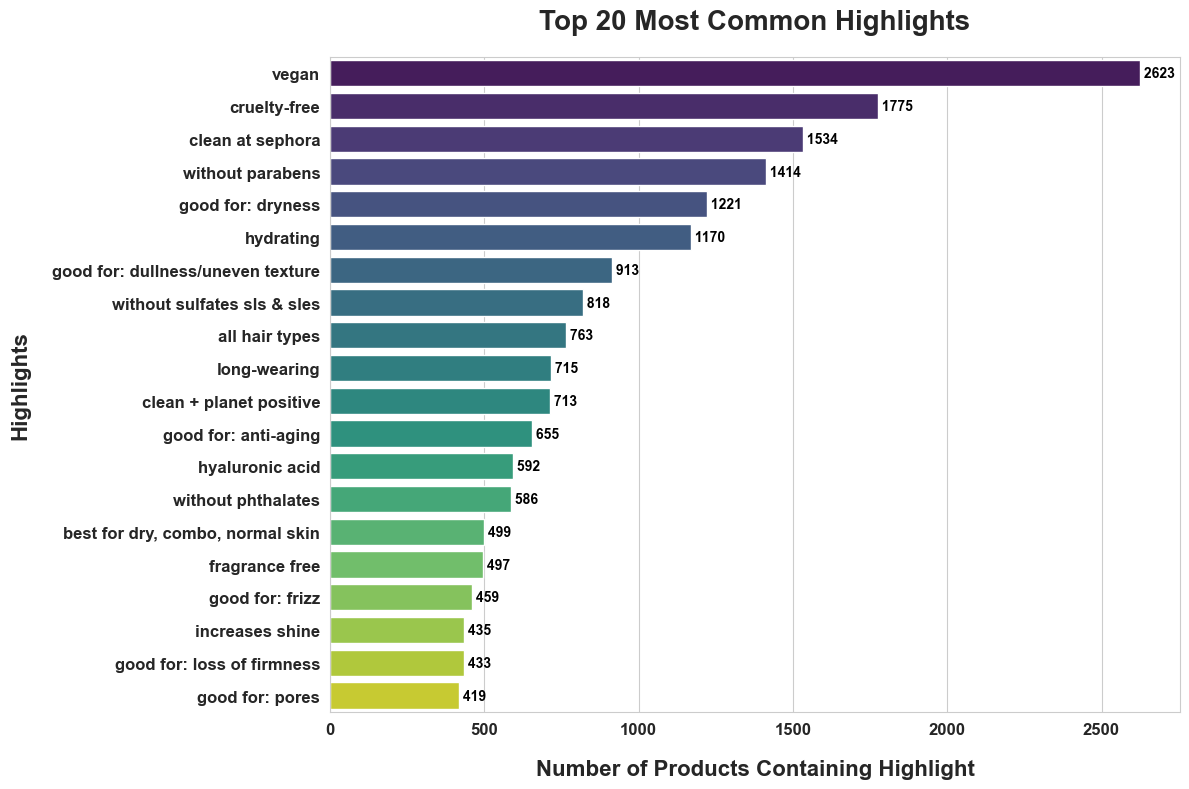

In [107]:
# Flatten the list of lists
all_highlights_flat = [highlight.lower() for sublist in product_info["highlights"] for highlight in sublist]
highlight_counts = Counter(all_highlights_flat)

# Get the top 20 most common highlights
most_common_highlights = highlight_counts.most_common(20)

# Prepare data for plotting
highlights, counts = zip(*most_common_highlights)

# Plot a horizontal bar chart showing the top 20 most common highlights across all products
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=list(counts), y=list(highlights), hue=list(highlights), palette="viridis")
plt.title("Top 20 Most Common Highlights", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Number of Products Containing Highlight", fontsize=16, fontweight="bold", labelpad=16)
plt.ylabel("Highlights", fontsize=16, fontweight="bold", labelpad=16)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# Add text annotations
for index, value in enumerate(counts):
    plt.text(value, index, f" {value}", color="black", va="center", fontweight="bold")

# Display the plot
plt.tight_layout()
plt.show()


## **8.2 Most Common Ingredients in Product**

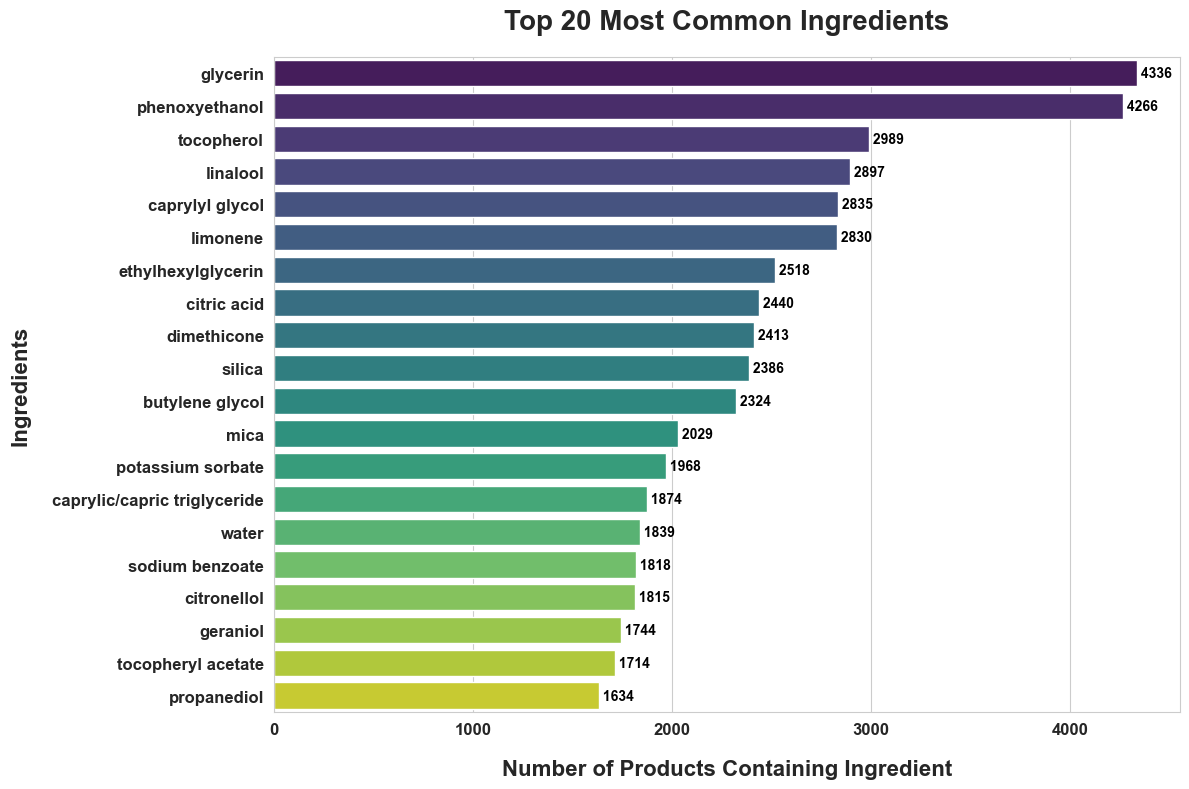

In [108]:
# Flatten the list of lists
all_ingredients_flat = [ingredient.lower() for sublist in product_info["ingredients_list"] for ingredient in sublist]
ingredient_counts = Counter(all_ingredients_flat)

# Get the top 20 most common ingredients
most_common_ingredients = ingredient_counts.most_common(20)

# Prepare data for plotting
ingredients, counts = zip(*most_common_ingredients)

# Plot a horizontal bar chart showing the top 20 most common ingredients across all products
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=list(counts), y=list(ingredients), hue=list(ingredients), palette="viridis")
plt.title("Top 20 Most Common Ingredients", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Number of Products Containing Ingredient", fontsize=16, fontweight="bold", labelpad=16)
plt.ylabel("Ingredients", fontsize=16, fontweight="bold", labelpad=16)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# Add text annotations
for index, value in enumerate(counts):
    plt.text(value, index, f" {value}", color="black", va="center", fontweight="bold")

# Display the plot
plt.tight_layout()
plt.show()


<blockquote style="background-color: yellow; color: black;"><strong>End of Part 1</strong></blockquote>


In [109]:
# Calculate the overall execution time
end_time = datetime.now()
execution_time = end_time - start_time
hours, remainder = divmod(execution_time.total_seconds(), 3600)
minutes, seconds = divmod(remainder, 60)

# Display the overall execution time
print(f"Start Time      : {start_time.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End Time        : {end_time.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Execution Time  : {int(hours)}h {int(minutes)}m {int(seconds)}s")


Start Time      : 2024-04-20 10:02:32
End Time        : 2024-04-20 10:04:07
Execution Time  : 0h 1m 34s
